<div class="markdown-google-sans">
 <center> <h1>Laboratory exercise P4: Text analysis for content and news</h1>
</div></centered>



  


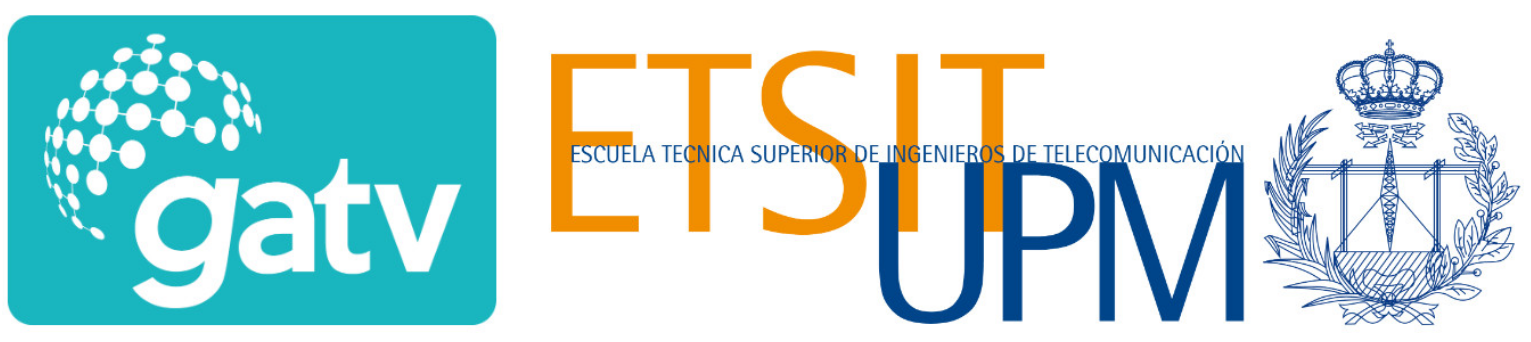

<div class="markdown-google-sans">
  <center> <h2>Media Data Systems Design</h1>
</div></centered>
<div class="markdown-google-sans">
  <center> <h2>Alberto Belmonte, Juan Antonio Rodrigo, José Manuel Menéndez</h1>
</div></centered>

<div class="markdown-google-sans">
  <center> <h2>Grupo de Aplicación de Telecomunicaciones Visuales - GATV
  
  Departamento de Señales, Sistemas y Radiocomunicaciones

  E.T.S. Ingenieros de Telecomunicación

  Universidad Politécnica de Madrid
</div></centered>
<div style="page-break-after: always"></div>

## Table of Contents
* [1. Introduction](#chapter1)
* [2. Purpose of the exercise](#chapter2)
* [3. Tools](#chapter3)
* [4. Practice development](#chapter4)
    * [4.1 Cleaning text](#section_4_1)
    * [4.2 Cluster analysis in text](#section_4_2)
    * [4.3 Word2Vec](#section_4_3)
    * [4.4 Word embeddings and t-SNE](#section_4_4)
    * [4.5 Text search engine](#section_4_5)
    * [4.6 Vectorization & Embeddings [ELMo, BERT, GPT]](#section_4_6)   
    * [4.7 Text classification with bert](#section_4_7)
* [5. Wrap up questions](#chapter5)       

<div class="markdown-google-sans">

## <strong>1. Introduction</strong>
</div>

Text analysis is a crucial component of natural language processing, which involves the use of computational methods to extract meaningful insights from large volumes of textual data. Automatic text analysis can help researchers and businesses alike to identify patterns, relationships, and trends within their textual data, providing valuable insights into topics such as customer feedback, market trends, and public sentiment.

In recent years, the development of powerful pre-trained language models, such as BERT (Bidirectional Encoder Representations from Transformers), has revolutionized the field of text analysis. These models are trained on massive amounts of text data and can be fine-tuned for specific tasks, such as sentiment analysis, question-answering, and named entity recognition. Using these models can greatly improve the accuracy and efficiency of text analysis.

Additionally, visualization techniques can help researchers and analysts to better understand the relationships and patterns within their textual data. Visualization tools such as word clouds, scatter plots, and network graphs can help to identify common themes, clusters of related terms, and the connections between different entities or concepts.


<div class="markdown-google-sans">

  ## <strong>2. Purpose of the exercise</strong>
</div>


This exercise is meant to be a comprehensive guide for automatic text analysis, including techniques for data preprocessing, feature extraction, and modeling. We will also discuss some common applications of text analysis, such as sentiment analysis, topic modeling, and named entity recognition. By the end of this practice, you should have a basic understanding of how to perform automated text analysis on your own data, as well as some practical experience working with popular tools and libraries in the field.

The exercise will take a step-by-step-by-step approach to automatic text analysis, from the process of cleaning and preprocessing our textual data up to the understanding of how a text search engine should work.

This document contains all the mandatory tasks that need to be performed by the student. Additionally you can find more exercises to put into practice what you have learned when completing this guide. These extra exercises are completely voluntary. These voluntary exercises use large amounts of data and, therefore, will take much computing time. Nevertheless we find them very interesting to put in practice the hopefully learned techniques applied to sentiment analysis and fake news classification.  

<div class="markdown-google-sans">

  ## <strong>3. Materials</strong>
</div>

All the materials will be available online without any download. In this way you can connect your drive to the material provided and work directly in google colab without any additional installation in your own computer or drive.

This document has been created as a Jupiter Notebook to be executed in the Google Colab environment for ease of use. This document is mainly a Jupyter Notebook format. It is made of text cells and code cells. To add a cell to the document just use the ***+Code*** or the ***+Text*** situated on the top left corner of the document. To edit a cell doucle click on the cell to get into edition mode. To run a code cell click on the play button that appears when the mouse is on the [ ] symbol on the left of the cell.

If a block is marked as *hidden* just click on the triangle on the left of the cell that preceeds the hidden block to unfold it.

For more informartion on using Google Colab you can take a look <a href="https://web.eecs.umich.edu/~justincj/teaching/eecs442/WI2021/colab.html">here</a>, for example,  among a lot of other places.

During the excercise the student will be asked to answer some questions and write some code. To do this, some empty cells have been created. Use this cells or create new ones as needed.

To enable this document to get access to the extra material you have to follow the following step:

1. In moodle you will have the link to access all the contents. If you open the link you will see all the material needed to this part. There is a a first notebook in the folder "How_to_use_the_materials" and follow the first steps at the begining.

2. Create the direct access like you have in the notebook and now you will have access to all the materials with any modification in the paths.

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
additional_data_path = "/content/drive/MyDrive/MEDS/Lesson6/Practice/datasets_utils/"

<div class="markdown-google-sans">

  ## <strong>4. Practice development</strong>
</div>

<div class="markdown-google-sans">

### <strong>4.1 Clean Text for Machine Learning</strong>
</div>



You cannot go straight from raw text to fitting a machine learning or deep learning model.

You must clean your text first, which means splitting it into words and handling punctuation and case.

In fact, there is a whole suite of text preparation methods that you may need to use, and the choice of methods really depends on your natural language processing task.

In this exercise, you will discover how you can clean and prepare your text ready for modeling with machine learning.

After completing this tutorial, you will know:

- How to get started by developing your own very simple text cleaning tools.
- How to take a step up and use the more sophisticated methods in the NLTK library.
- How to prepare text when using modern text representation methods like word embeddings.

This section is divided into 6 parts; they are:

- Metamorphosis by Franz Kafka
- Text Cleaning is Task Specific
- Manual Tokenization
- Tokenization and Cleaning with NLTK
- Additional Text Cleaning Considerations
- Tips for Cleaning Text for Word Embedding

<div class="markdown-google-sans">

#### <strong>4.1.1 Metamorphosis by Franz Kafka</strong>
</div>

Let’s start off by selecting a dataset.

In this tutorial, we will use the text from the book Metamorphosis by Franz Kafka.

The full text for Metamorphosis is available for free from Project Gutenberg but it is already downloaded in this project.

http://www.gutenberg.org/cache/epub/5200/pg5200.txt

The file contains header and footer information that we are not interested in, specifically copyright and license information. Open the file and delete the header and footer information and save the file as “metamorphosis_clean.txt“.

The start of the clean file should look like:

"One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin."

The file should end with:

"And, as if in confirmation of their new dreams and good intentions, as soon as they reached their destination Grete was the first to get up and stretch out her young body."

<div class="markdown-google-sans">

#### <strong>4.1.2 Text Cleaning Is Task Specific</strong>
</div>

After actually getting a hold of your text data, the first step in cleaning up text data is to have a strong idea about what you’re trying to achieve, and in that context review your text to see what exactly might help.

Take a moment to look at the text. What do you notice?

Here’s what I see:

It’s plain text so there is no markup to parse (yay!).
The translation of the original German uses UK English (e.g. “travelling“).
The lines are artificially wrapped with new lines at about 70 characters (meh).
There are no obvious typos or spelling mistakes.
There’s punctuation like commas, apostrophes, quotes, question marks, and more.
There’s hyphenated descriptions like “armour-like”.
There’s a lot of use of the em dash (“-“) to continue sentences (maybe replace with commas?).
There are names (e.g. “Mr. Samsa“)
There does not appear to be numbers that require handling (e.g. 1999)
There are section markers (e.g. “II” and “III”), and we have removed the first “I”.
I’m sure there is a lot more going on to the trained eye.

We are going to look at general text cleaning steps in this tutorial.

Nevertheless, consider some possible objectives we may have when working with this text document.

For example:

If we were interested in developing a Kafkaesque language model, we may want to keep all of the case, quotes, and other punctuation in place.
If we were interested in classifying documents as “Kafka” and “Not Kafka,” maybe we would want to strip case, punctuation, and even trim words back to their stem.
Use your task as the lens by which to choose how to ready your text data.



<div class="markdown-google-sans">

#### <strong>4.1.3 Manual Tokenization</strong>
</div>

Text cleaning is hard, but the text we have chosen to work with is pretty clean already.

We could just write some Python code to clean it up manually, and this is a good exercise for those simple problems that you encounter. Tools like regular expressions and splitting strings can get you a long way.


<div class="markdown-google-sans">

##### Load Data
</div>

Let’s load the text data so that we can work with it.

The text is small and will load quickly and easily fit into memory. This will not always be the case and you may need to write code to memory map the file. Tools like NLTK (covered in the next section) will make working with large files much easier.

We can load the entire “metamorphosis_clean.txt” into memory as follows:

In [ ]:
# Download additional resources from NLTK text processing library
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# load text
filename = additional_data_path+'metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()

<div class="markdown-google-sans">

##### Split by Whitespace
</div>


Clean text often means a list of words or tokens that we can work with in our machine learning models.

This means converting the raw text into a list of words and saving it again.

A very simple way to do this would be to split the document by white space, including ” “, new lines, tabs and more. We can do this in Python with the split() function on the loaded string.

In [ ]:
# split into words by white space
words = text.split()
print(words[:100])

['\ufeffI', 'One', 'morning,', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams,', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin.', 'He', 'lay', 'on', 'his', 'armour-like', 'back,', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly,', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections.', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment.', 'His', 'many', 'legs,', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him,', 'waved', 'about', 'helplessly', 'as', 'he', 'looked.', '"What\'s', 'happened', 'to', 'me?"', 'he', 'thought.', 'It', "wasn't", 'a', 'dream.', 'His', 'room,', 'a', 'proper']


Running the example splits the document into a long list of words and prints the first 100 for us to review.

We can see that punctuation is preserved (e.g. “wasn’t” and “armour-like“), which is nice. We can also see that end of sentence punctuation is kept with the last word (e.g. “thought.”), which is not great.

<div class="markdown-google-sans">

##### Select Words
</div>

Another approach might be to use the regex model (re) and split the document into words by selecting for strings of alphanumeric characters (a-z, A-Z, 0-9 and ‘_’).

For example:

In [ ]:
# split based on words only
import re
words = re.split(r'\W+', text)
print(words[:100])

['', 'I', 'One', 'morning', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', 'He', 'lay', 'on', 'his', 'armour', 'like', 'back', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment', 'His', 'many', 'legs', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', 'waved', 'about', 'helplessly', 'as', 'he', 'looked', 'What', 's', 'happened', 'to', 'me', 'he', 'thought', 'It', 'wasn', 't', 'a', 'dream']


Again, running the example we can see that we get our list of words. This time, we can see that “armour-like” is now two words “armour” and “like” (fine) but contractions like “What’s” is also two words “What” and “s” (not great).

<div class="markdown-google-sans">

##### Split by Whitespace and Remove Punctuation
</div>


We may want the words, but without the punctuation like commas and quotes. We also want to keep contractions together.

One way would be to split the document into words by white space (as in “2. Split by Whitespace“), then use string translation to replace all punctuation with nothing (e.g. remove it).

Python provides a constant called string.punctuation that provides a great list of punctuation characters. For example:


print(string.punctuation)


In [ ]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


Python offers a function called translate() that will map one set of characters to another.

We can use the function maketrans() to create a mapping table. We can create an empty mapping table, but the third argument of this function allows us to list all of the characters to remove during the translation process. For example:

In [ ]:
table = str.maketrans('', '', string.punctuation)

We can put all of this together, load the text file, split it into words by white space, then translate each word to remove the punctuation.

In [ ]:
# split into words by white space
words = text.split()
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in words]
print(stripped[:100])

['\ufeffI', 'One', 'morning', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', 'He', 'lay', 'on', 'his', 'armourlike', 'back', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment', 'His', 'many', 'legs', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', 'waved', 'about', 'helplessly', 'as', 'he', 'looked', 'Whats', 'happened', 'to', 'me', 'he', 'thought', 'It', 'wasnt', 'a', 'dream', 'His', 'room', 'a', 'proper']


We can see that this has had the desired effect, mostly.

Contractions like “What’s” have become “Whats” but “armour-like” has become “armourlike“.

If you know anything about regex, then you know things can get complex from here.

<div class="markdown-google-sans">

##### Normalizing Case
</div>

It is common to convert all words to one case.

This means that the vocabulary will shrink in size, but some distinctions are lost (e.g. “Apple” the company vs “apple” the fruit is a commonly used example).

We can convert all words to lowercase by calling the lower() function on each word.

For example:

In [ ]:
# split into words by white space
words = text.split()
# convert to lower case
words = [word.lower() for word in words]
print(words[:100])

['\ufeffi', 'one', 'morning,', 'when', 'gregor', 'samsa', 'woke', 'from', 'troubled', 'dreams,', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin.', 'he', 'lay', 'on', 'his', 'armour-like', 'back,', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly,', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections.', 'the', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment.', 'his', 'many', 'legs,', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him,', 'waved', 'about', 'helplessly', 'as', 'he', 'looked.', '"what\'s', 'happened', 'to', 'me?"', 'he', 'thought.', 'it', "wasn't", 'a', 'dream.', 'his', 'room,', 'a', 'proper']


Running the example, we can see that all words are now lowercase.

Note:

Cleaning text is really hard, problem specific, and full of tradeoffs.

Remember, simple is better.

Simpler text data, simpler models, smaller vocabularies. You can always make things more complex later to see if it results in better model skill.

Next, we’ll look at some of the tools in the NLTK library that offer more than simple string splitting.

<div class="markdown-google-sans">

#### 4.1.4 Tokenization and Cleaning with NLTK
</div>


The Natural Language Toolkit, or NLTK for short, is a Python library written for working and modeling text.

It provides good tools for loading and cleaning text that we can use to get our data ready for working with machine learning and deep learning algorithms.

<div class="markdown-google-sans">

##### Split into Sentences
</div>

A good useful first step is to split the text into sentences.

Some modeling tasks prefer input to be in the form of paragraphs or sentences, such as word2vec. You could first split your text into sentences, split each sentence into words, then save each sentence to file, one per line.

NLTK provides the sent_tokenize() function to split text into sentences.

The example below loads the “metamorphosis_clean.txt” file into memory, splits it into sentences, and prints the first sentence.

In [ ]:
# split into sentences
from nltk import sent_tokenize
sentences = sent_tokenize(text)
print(sentences[0])

﻿I


One morning, when Gregor Samsa woke from troubled dreams, he found
himself transformed in his bed into a horrible vermin.


Running the example, we can see that although the document is split into sentences, that each sentence still preserves the new line from the artificial wrap of the lines in the original document.

<div class="markdown-google-sans">

##### Split into Words
</div>

NLTK provides a function called word_tokenize() for splitting strings into tokens (nominally words).

It splits tokens based on white space and punctuation. For example, commas and periods are taken as separate tokens. Contractions are split apart (e.g. “What’s” becomes “What” “‘s“). Quotes are kept, and so on.

For example:

In [ ]:
# split into words
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)
print(tokens[:100])

['\ufeffI', 'One', 'morning', ',', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', ',', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', '.', 'He', 'lay', 'on', 'his', 'armour-like', 'back', ',', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', ',', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', '.', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment', '.', 'His', 'many', 'legs', ',', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', ',', 'waved', 'about', 'helplessly', 'as', 'he', 'looked', '.', '``', 'What', "'s", 'happened']


Running the code, we can see that punctuation are now tokens that we could then decide to specifically filter out.

<div class="markdown-google-sans">

##### Filter Out Punctuation
</div>

We can filter out all tokens that we are not interested in, such as all standalone punctuation.

This can be done by iterating over all tokens and only keeping those tokens that are all alphabetic. Python has the function isalpha() that can be used. For example:

In [ ]:
# filter out punctuation
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)
# remove all tokens that are not alphabetic
words = [word for word in tokens if word.isalpha()]
print(words[:100])

['One', 'morning', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', 'He', 'lay', 'on', 'his', 'back', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment', 'His', 'many', 'legs', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', 'waved', 'about', 'helplessly', 'as', 'he', 'looked', 'What', 'happened', 'to', 'me', 'he', 'thought', 'It', 'was', 'a', 'dream', 'His', 'room', 'a', 'proper', 'human', 'room']


Running the example, you can see that not only punctuation tokens, but examples like “armour-like” and “‘s” were also filtered out.

<div class="markdown-google-sans">

##### Filter out Stop Words (and Pipeline)
</div>


Stop words are those words that do not contribute to the deeper meaning of the phrase.

They are the most common words such as: “the“, “a“, and “is“.

For some applications like documentation classification, it may make sense to remove stop words.

NLTK provides a list of commonly agreed upon stop words for a variety of languages, such as English. They can be loaded as follows:

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

You can see that they are all lower case and have punctuation removed.

You could compare your tokens to the stop words and filter them out, but you must ensure that your text is prepared the same way.

Complete pipeline

Let’s demonstrate this with a small pipeline of text preparation including:

- Load the raw text.
- Split into tokens.
- Convert to lowercase.
- Remove punctuation from each token.
- Filter out remaining tokens that are not alphabetic.
- Filter out tokens that are stop words.

In [ ]:
# load data
#filename = 'data/metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)
# convert to lower case
tokens = [w.lower() for w in tokens]
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]
# filter out stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:100])

['one', 'morning', 'gregor', 'samsa', 'woke', 'troubled', 'dreams', 'found', 'transformed', 'bed', 'horrible', 'vermin', 'lay', 'armourlike', 'back', 'lifted', 'head', 'little', 'could', 'see', 'brown', 'belly', 'slightly', 'domed', 'divided', 'arches', 'stiff', 'sections', 'bedding', 'hardly', 'able', 'cover', 'seemed', 'ready', 'slide', 'moment', 'many', 'legs', 'pitifully', 'thin', 'compared', 'size', 'rest', 'waved', 'helplessly', 'looked', 'happened', 'thought', 'nt', 'dream', 'room', 'proper', 'human', 'room', 'although', 'little', 'small', 'lay', 'peacefully', 'four', 'familiar', 'walls', 'collection', 'textile', 'samples', 'lay', 'spread', 'table', 'samsa', 'travelling', 'salesman', 'hung', 'picture', 'recently', 'cut', 'illustrated', 'magazine', 'housed', 'nice', 'gilded', 'frame', 'showed', 'lady', 'fitted', 'fur', 'hat', 'fur', 'boa', 'sat', 'upright', 'raising', 'heavy', 'fur', 'muff', 'covered', 'whole', 'lower', 'arm', 'towards', 'viewer']


Running this example, we can see that in addition to all of the other transforms, stop words like “a” and “to” have been removed.

I note that we are still left with tokens like “nt“. The rabbit hole is deep; there’s always more we can do.

<div class="markdown-google-sans">

##### Stem Words
</div>

Stemming refers to the process of reducing each word to its root or base.

For example “fishing,” “fished,” “fisher” all reduce to the stem “fish.”

Some applications, like document classification, may benefit from stemming in order to both reduce the vocabulary and to focus on the sense or sentiment of a document rather than deeper meaning.

There are many stemming algorithms, although a popular and long-standing method is the Porter Stemming algorithm. This method is available in NLTK via the PorterStemmer class.

For example:

In [ ]:
# load data
filename = additional_data_path+'metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)
# stemming of words
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in tokens]
print(stemmed[:100])

['\ufeffi', 'one', 'morn', ',', 'when', 'gregor', 'samsa', 'woke', 'from', 'troubl', 'dream', ',', 'he', 'found', 'himself', 'transform', 'in', 'hi', 'bed', 'into', 'a', 'horribl', 'vermin', '.', 'he', 'lay', 'on', 'hi', 'armour-lik', 'back', ',', 'and', 'if', 'he', 'lift', 'hi', 'head', 'a', 'littl', 'he', 'could', 'see', 'hi', 'brown', 'belli', ',', 'slightli', 'dome', 'and', 'divid', 'by', 'arch', 'into', 'stiff', 'section', '.', 'the', 'bed', 'wa', 'hardli', 'abl', 'to', 'cover', 'it', 'and', 'seem', 'readi', 'to', 'slide', 'off', 'ani', 'moment', '.', 'hi', 'mani', 'leg', ',', 'piti', 'thin', 'compar', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', ',', 'wave', 'about', 'helplessli', 'as', 'he', 'look', '.', '``', 'what', "'s", 'happen']


Running the example, you can see that words have been reduced to their stems, such as “trouble” has become “troubl“. You can also see that the stemming implementation has also reduced the tokens to lowercase, likely for internal look-ups in word tables.

You can also see that the stemming implementation has also reduced the tokens to lowercase, likely for internal look-ups in word tables.

There is a nice suite of stemming and lemmatization algorithms to choose from in NLTK, if reducing words to their root is something you need for your project.

<div class="markdown-google-sans">

#### <strong>4.1.5 Additional Text Cleaning Considerations</strong>
</div>




We are only getting started.

Because the source text for this tutorial was reasonably clean to begin with, we skipped many concerns of text cleaning that you may need to deal with in your own project.

Here is a short list of additional considerations when cleaning text:

- Handling large documents and large collections of text documents that do not fit into memory.
- Extracting text from markup like HTML, PDF, or other structured document formats.
- Transliteration of characters from other languages into English.
- Decoding Unicode characters into a normalized form, such as UTF8.
- Handling of domain specific words, phrases, and acronyms.
- Handling or removing numbers, such as dates and amounts.
- Locating and correcting common typos and misspellings.

The list could go on.

Hopefully, you can see that getting truly clean text is impossible, that we are really doing the best we can based on the time, resources, and knowledge we have.

The idea of “clean” is really defined by the specific task or concern of your project.

A pro tip is to continually review your tokens after every transform. I have tried to show that in this tutorial and I hope you take that to heart.

Ideally, you would save a new file after each transform so that you can spend time with all of the data in the new form. Things always jump out at you when to take the time to review your data.

Have you done some text cleaning before? What are you preferred pipeline of transforms?
Let me know in the comments below.

<div class="markdown-google-sans">

#### <strong>4.1.6 Tips for Cleaning Text for Word Embedding</strong>
</div>



Recently, the field of natural language processing has been moving away from bag-of-word models and word encoding toward word embeddings.

The benefit of word embeddings is that they encode each word into a dense vector that captures something about its relative meaning within the training text.

This means that variations of words like case, spelling, punctuation, and so on will automatically be learned to be similar in the embedding space. In turn, this can mean that the amount of cleaning required from your text may be less and perhaps quite different to classical text cleaning.

For example, it may no-longer make sense to stem words or remove punctuation for contractions.

Tomas Mikolov is one of the developers of word2vec, a popular word embedding method. He suggests only very minimal text cleaning is required when learning a word embedding model.

Comment on the results of this section. What are the benefits and disadvantages of cleaning the text?

<font color='blue'>Answer:</font>

As we have seen through out this section text cleaning is a complex task as you can always do something more. It is also important to mention that depending on the source and purposes of the text certain cleaning text techniques are more appropiate. As the author comments if we want for example to classify the text into kafeske language or not we should consider to only keep the stem of the words.

In this answer I am going to comment some of the advantages and disadavantages of the different cleaning text techniques for the kafka metamorphosis text.
- **Split by Whitespace**: It is good that it is simple but it doesn't handle the punctuation effectively and it cannot distinguis between meaningfull whitespaces. For example the word *armour-like* is separated into two words: *armour* and *like*, where maybe it is more convenient to keep it as one.
- **Select words with Regex**: This technique is good when targeting specific patterns, but as the author says it is a very complicated technique and it might be too sepcific. With this technique we also split the word *armour-like* into two separate words.
- **Split by Whitespace and remove punctuation**: With this technique we improve the first one in this list by handling correctly the punctuation.
- **Normalizing Case**: It is also a simple technique but we loose the importance of uppercase, which might be importatn to the context of the text.
- **Tokenization with NLTK**: Tokenization techniques are widly use for NLP tasks. It is more complex that the other cleaning techniques and it handles very well the punctuation.
- **Stem Words**: With this we are capable of creating a much more efficient vocabulary. Although bu stemming we might lose important information.

In conclusion, the text cleaning strategy that we choose highly depends on the type of text and the task we want to achieve. And it is important to find a balance between cleaning text while being effective and without losing information.

<div class="markdown-google-sans">

### <strong>4.2 Document Clustering</strong>
</div>

In this section it is explained how to cluster a set of documents using Python. The goal of the example is to identify the latent structures within the synopses of the top 100 films of all time (per an IMDB list). See the original post for a more detailed discussion on the example. This guide covers:

- tokenizing and stemming each synopsis
- transforming the corpus into vector space using tf-idf
- calculating cosine distance between each document as a measure of similarity
- clustering the documents using the k-means algorithm
- using multidimensional scaling to reduce dimensionality within the corpus
- conducting a hierarchical clustering on the corpus using Ward clustering
- plotting a Ward dendrogram
- topic modeling using Latent Dirichlet Allocation (LDA)

In [ ]:
import numpy as np
import pandas as pd
import nltk
from bs4 import BeautifulSoup
import re
import os
import codecs
from sklearn import feature_extraction

<div class="markdown-google-sans">

#### <strong>4.2.1 Stopwords, stemming, and tokenizing</strong>
</div>

For the purposes of this walkthrough, imagine that I have 2 primary lists:
- 'titles': the titles of the films in their rank order
- 'synopses': the synopses of the films matched to the 'titles' order

In [ ]:
title_list = additional_data_path+'title_list.txt'
link_list = additional_data_path+'link_list_imdb.txt'
synopses_list_wiki = additional_data_path+'synopses_list_wiki.txt'
synopses_list_imdb = additional_data_path+'synopses_list_imdb.txt'
genres_list = additional_data_path+'genres_list.txt'

In [ ]:
#import three lists: titles, links and wikipedia synopses
titles = open(title_list, encoding="utf8").read().split('\n')
#ensures that only the first 100 are read in
titles = titles[:100]

links = open(link_list, encoding="utf8").read().split('\n')
links = links[:100]

synopses_wiki = open(synopses_list_wiki, encoding="utf8").read().split('\n BREAKS HERE')
synopses_wiki = synopses_wiki[:100]

synopses_clean_wiki = []
for text in synopses_wiki:
    text = BeautifulSoup(text, 'html.parser').getText()
    #strips html formatting and converts to unicode
    synopses_clean_wiki.append(text)

synopses_wiki = synopses_clean_wiki


genres = open(genres_list, encoding="utf8").read().split('\n')
genres = genres[:100]

print(str(len(titles)) + ' titles')
print(str(len(links)) + ' links')
print(str(len(synopses_wiki)) + ' synopses')
print(str(len(genres)) + ' genres')

100 titles
100 links
100 synopses
100 genres


An example of the first 10 movie titles and the first 200 characters in first synopses (for 'The Godfather') can be shown below:

In [ ]:
print(titles[:10])
print(synopses_wiki[0][:200])

['The Godfather', 'The Shawshank Redemption', "Schindler's List", 'Raging Bull', 'Casablanca', "One Flew Over the Cuckoo's Nest", 'Gone with the Wind', 'Citizen Kane', 'The Wizard of Oz', 'Titanic']
 Plot  [edit]  [  [  edit  edit  ]  ]  
  On the day of his only daughter's wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. Vito's youngest son,


In [ ]:
synopses_imdb = open(synopses_list_imdb).read().split('\n BREAKS HERE')
synopses_imdb = synopses_imdb[:100]

synopses_clean_imdb = []

for text in synopses_imdb:
    text = BeautifulSoup(text, 'html.parser').getText()
    #strips html formatting and converts to unicode
    synopses_clean_imdb.append(text)

synopses_imdb = synopses_clean_imdb

In [ ]:
synopses = []

for i in range(len(synopses_wiki)):
    item = synopses_wiki[i] + synopses_imdb[i]
    synopses.append(item)

In [ ]:
# generates index for each item in the corpora (in this case it's just rank) and I'll use this for scoring later
ranks = []

for i in range(0,len(titles)):
    ranks.append(i)

This section is focused on defining some functions to manipulate the synopses. First, I load [NLTK's](http://www.nltk.org/) list of English stop words. [Stop words](http://en.wikipedia.org/wiki/Stop_words) are words like "a", "the", or "in" which don't convey significant meaning. I'm sure there are much better explanations of this out there.

In [ ]:
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

print(stopwords[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


Next I import the [Snowball Stemmer](http://snowball.tartarus.org/) which is actually part of NLTK. [Stemming](http://en.wikipedia.org/wiki/Stemming) is just the process of breaking a word down into its root.

In [ ]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")


Below I define two functions:

<ul>
<li> *tokenize_and_stem*: tokenizes (splits the synopsis into a list of its respective words (or tokens) and also stems each token <li> *tokenize_only*: tokenizes the synopsis only
</ul>

I use both these functions to create a dictionary which becomes important in case I want to use stems for an algorithm, but later convert stems back to their full words for presentation purposes. Guess what, I do want to do that!



In [ ]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

Below we use the stemming/tokenizing and tokenizing functions to iterate over the list of synopses to create two vocabularies: one stemmed and one only tokenized.

In [ ]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in synopses:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)

    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

Using these two lists, lets create a pandas DataFrame with the stemmed vocabulary as the index and the tokenized words as the column. The benefit of this is it provides an efficient way to look up a stem and return a full token. The downside here is that stems to tokens are one to many: the stem 'run' could be associated with 'ran', 'runs', 'running', etc. For my purposes this is fine--I'm perfectly happy returning the first token associated with the stem I need to look up.

In [ ]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 312302 items in vocab_frame


You'll notice there is clearly some repetition here. I could clean it up, but there are only 312209 items in the DataFrame which isn't huge overhead in looking up a stemmed word based on the stem-index.

In [ ]:
print(vocab_frame.head())

     words
plot  plot
edit  edit
edit  edit
edit  edit
on      on


<div class="markdown-google-sans">

#### <strong>4.2.2 Tf-idf and document similarity</strong>
</div>







<img src='http://www.jiem.org/index.php/jiem/article/viewFile/293/252/2402' align='right' style="margin-left:10px">

Here, I define term frequency-inverse document frequency (tf-idf) vectorizer parameters and then convert the *synopses* list into a tf-idf matrix.

To get a Tf-idf matrix, first count word occurrences by document. This is transformed into a document-term matrix (dtm). This is also just called a term frequency matrix. An example of a dtm is here at right.

Then apply the term frequency-inverse document frequency weighting: words that occur frequently within a document but not frequently within the corpus receive a higher weighting as these words are assumed to contain more meaning in relation to the document.

A couple things to note about the parameters I define below:

<ul>
<li> max_df: this is the maximum frequency within the documents a given feature can have to be used in the tfi-idf matrix. If the term is in greater than 80% of the documents it probably cares little meanining (in the context of film synopses)
<li> min_idf: this could be an integer (e.g. 5) and the term would have to be in at least 5 of the documents to be considered. Here I pass 0.2; the term must be in at least 20% of the document. I found that if I allowed a lower min_df I ended up basing clustering on names--for example "Michael" or "Tom" are names found in several of the movies and the synopses use these names frequently, but the names carry no real meaning.
<li> ngram_range: this just means I'll look at unigrams, bigrams and trigrams. See [n-grams](http://en.wikipedia.org/wiki/N-gram)
</ul>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(synopses)

print(tfidf_matrix.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev'

CPU times: user 9.99 s, sys: 100 ms, total: 10.1 s
Wall time: 10.3 s
(100, 563)


terms is just a list of the features used in the tf-idf matrix. This is a vocabulary

In [ ]:
terms = tfidf_vectorizer.get_feature_names_out()

dist is defined as 1 - the cosine similarity of each document. Cosine similarity is measured against the tf-idf matrix and can be used to generate a measure of similarity between each document and the other documents in the corpus (each synopsis among the synopses). Subtracting it from 1 provides cosine distance which I will use for plotting on a euclidean (2-dimensional) plane.

Note that with dist it is possible to evaluate the similarity of any two or more synopses.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)


<div class="markdown-google-sans">

#### <strong>4.2.3 K-means clustering</strong>
</div>


Now onto the fun part. Using the tf-idf matrix, you can run a slew of clustering algorithms to better understand the hidden structure within the synopses. I first chose [k-means](http://en.wikipedia.org/wiki/K-means_clustering). K-means initializes with a pre-determined number of clusters (I chose 5). Each observation is assigned to a cluster (cluster assignment) so as to minimize the within cluster sum of squares. Next, the mean of the clustered observations is calculated and used as the new cluster centroid. Then, observations are reassigned to clusters and  centroids recalculated in an iterative process until the algorithm reaches convergence.

I found it took several runs for the algorithm to converge a global optimum as k-means is susceptible to reaching local optima.

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 133 ms, sys: 7.93 ms, total: 141 ms
Wall time: 110 ms


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import joblib

joblib.dump(km,  'doc_cluster.pkl')
km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

In [ ]:
import pandas as pd

films = { 'title': titles, 'rank': ranks, 'synopsis': synopses, 'cluster': clusters, 'genre': genres }

frame = pd.DataFrame(films, index = [clusters] , columns = ['rank', 'title', 'cluster', 'genre'])

In [ ]:
frame['cluster'].value_counts()

cluster
2    62
3    21
1     9
4     5
0     3
Name: count, dtype: int64

In [ ]:
grouped = frame['rank'].groupby(frame['cluster'])

grouped.mean()

cluster
0    16.333333
1    64.111111
2    50.951613
3    42.428571
4    54.800000
Name: rank, dtype: float64

Note that clusters 4 and 0 have the lowest rank, which indicates that they, on average, contain films that were ranked as "better" on the top 100 list.

Here is some fancy indexing and sorting on each cluster to identify which are the top n (I chose n=6) words that are nearest to the cluster centroid. This gives a good sense of the main topic of the cluster.

In [ ]:
from __future__ import print_function

print("Top terms per cluster:")
print()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    for ind in order_centroids[i, :6]:
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print()
    print()
    print("Cluster %d titles:" % i, end='')
    for title in frame.loc[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print()
    print()

Top terms per cluster:

Cluster 0 words: b'ship', b'board', b'station', b'black', b'death', b'destroyed',

Cluster 0 titles: Titanic, Star Wars, 2001: A Space Odyssey,

Cluster 1 words: b'john', b'car', b'new', b'york', b'new', b'apartments',

Cluster 1 titles: Sunset Blvd., The Good, the Bad and the Ugly, The Apartment, The French Connection, Midnight Cowboy, Annie Hall, The Green Mile, American Graffiti, Taxi Driver,

Cluster 2 words: b'father', b'family', b'home', b'police', b'house', b'love',

Cluster 2 titles: The Godfather, The Shawshank Redemption, Raging Bull, Casablanca, Gone with the Wind, Citizen Kane, The Wizard of Oz, The Godfather: Part II, Psycho, Vertigo, On the Waterfront, Forrest Gump, The Sound of Music, West Side Story, E.T. the Extra-Terrestrial, The Silence of the Lambs, Chinatown, Singin' in the Rain, Some Like It Hot, 12 Angry Men, Amadeus, Gandhi, Unforgiven, Rocky, A Streetcar Named Desire, To Kill a Mockingbird, An American in Paris, The Best Years of Our Liv

In [ ]:
#This is purely to help export tables to html and to correct for my 0 start rank (so that Godfather is 1, not 0)
frame['Rank'] = frame['rank'] + 1
frame['Title'] = frame['title']

<div class="markdown-google-sans">

#### <strong>4.2.4 Multidimensional scaling</strong>
</div>


Here is some code to convert the dist matrix into a 2-dimensional array using multidimensional scaling with MDS. Another option would be to use principal component analysis.

In [ ]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [ ]:
#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns



<div class="markdown-google-sans">

#### <strong>4.2.5 Visualizing document clusters</strong>
</div>




In this section, it is demonstrated how you can visualize the document clustering output using matplotlib.

First some dictionaries are defined for going from cluster number to color and to cluster name. It is based the cluster names off the words that were closest to each cluster centroid.

In [ ]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'Family, home, war',
                 1: 'Police, killed, murders',
                 2: 'Father, New York, brothers',
                 3: 'Dance, singing, love',
                 4: 'Killed, soldiers, captain'}

Next, the labeled observations are plotted (films, film titles) colored by cluster using matplotlib.

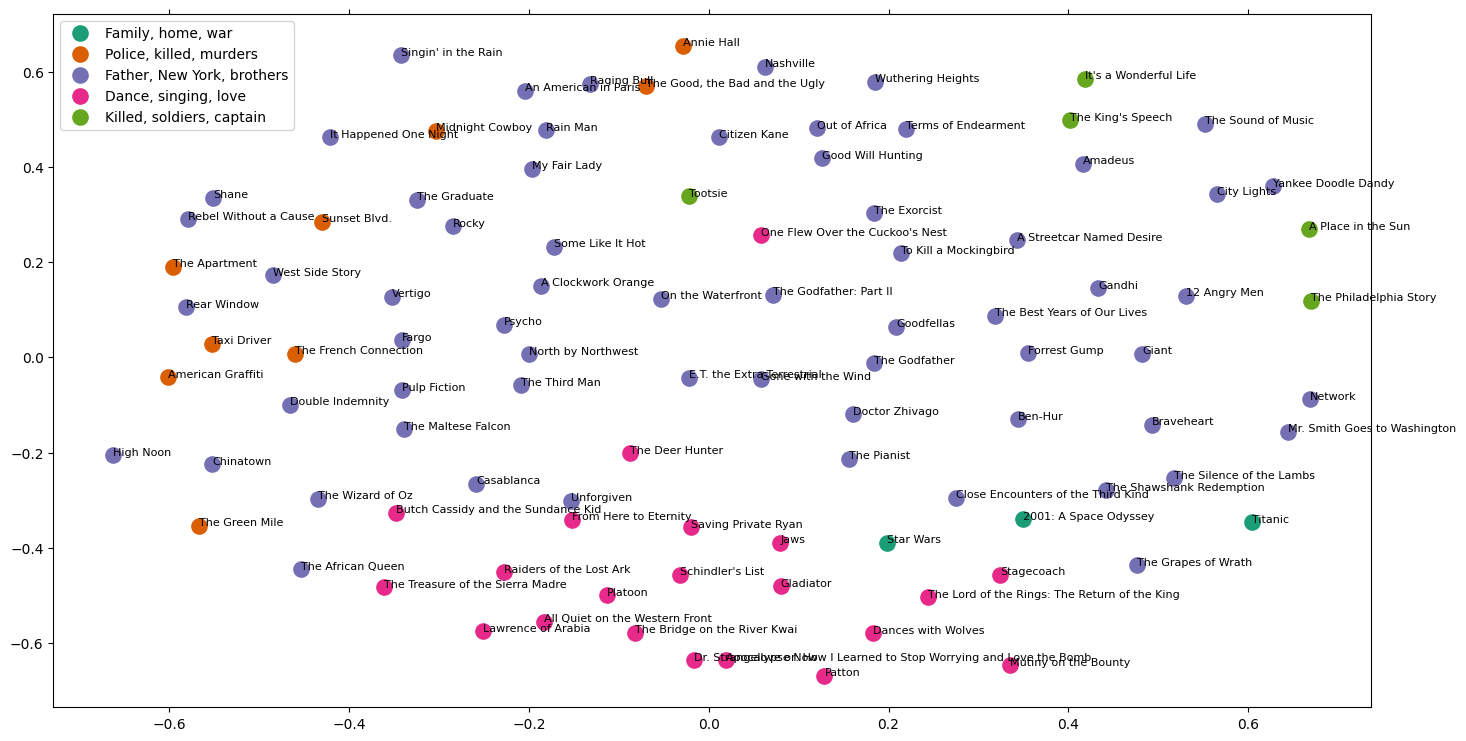

In [ ]:
%matplotlib inline

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles))

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')

ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=8)



plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

In [ ]:
plt.close()


<div class="markdown-google-sans">

#### <strong>4.2.6 Hierarchical document clustering</strong>
</div>



Now that we were successfuly able to cluster and plot the documents using k-means, we will try another clustering algorithm. The Ward clustering algorithm is chosen because it offers hierarchical clustering. Ward clustering is an agglomerative clustering method, meaning that at each stage, the pair of clusters with minimum between-cluster distance are merged. We can use the precomputed cosine distance matrix (dist) to calculate a linkage_matrix, which is then plotted as a dendrogram.

Note that this method returned 3 primary clusters, with the largest cluster being split into about 4 major subclusters. Note that the cluster in red contains many of the "Killed, soldiers, captain" films. Braveheart and Gladiator are within the same low-level cluster which is interesting as these are probably my two favorite movies.

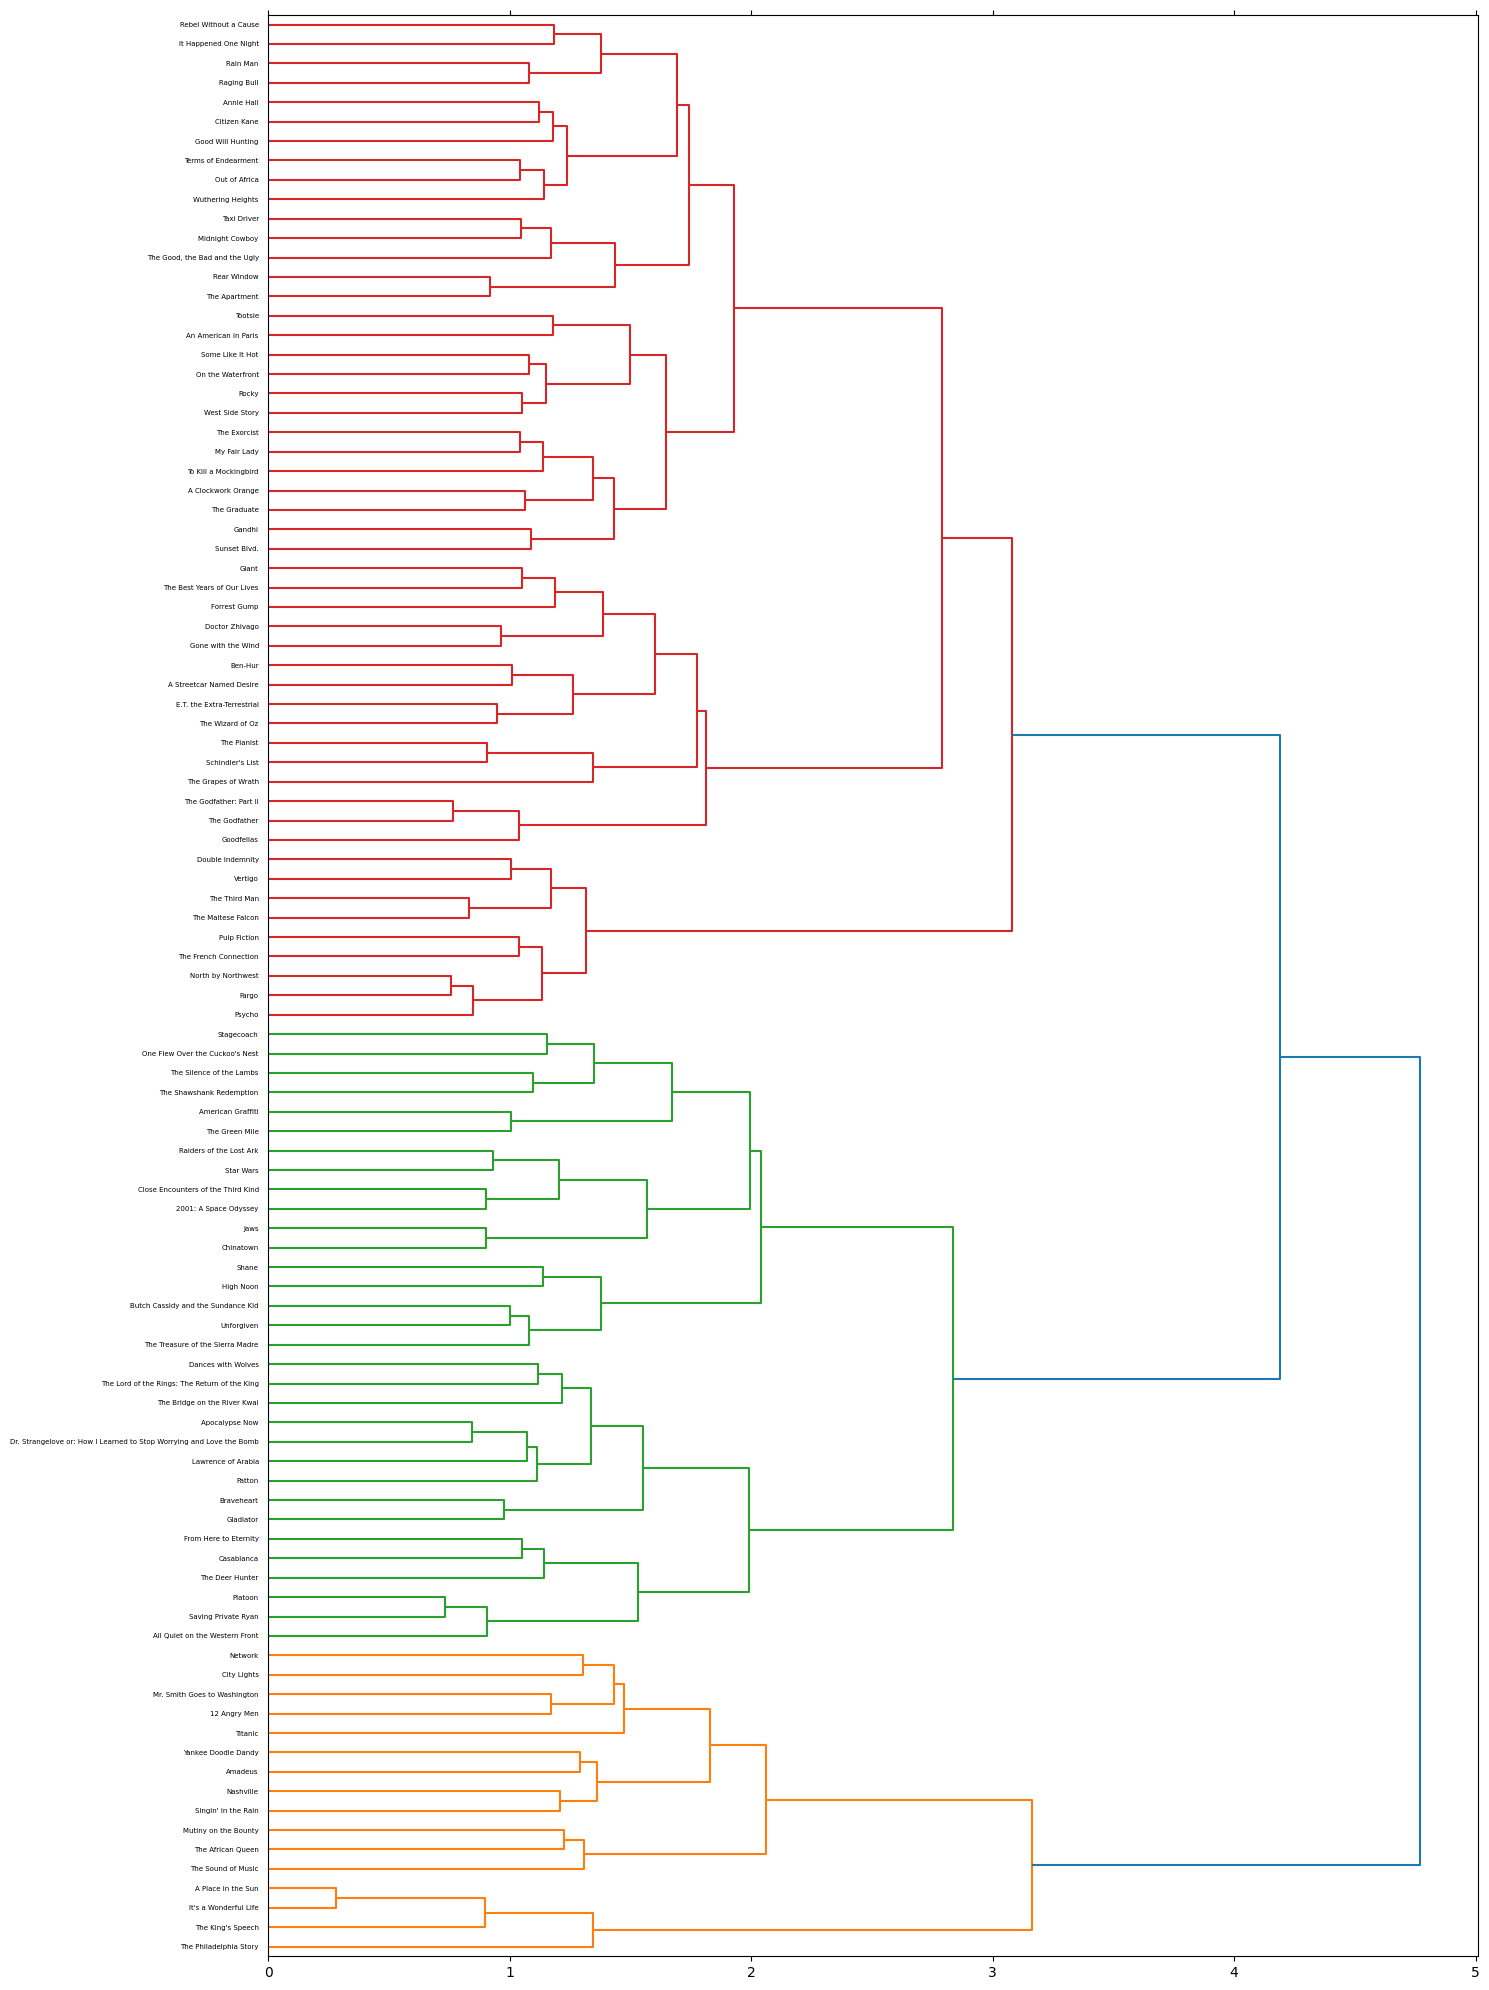

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [ ]:
plt.close()


<div class="markdown-google-sans">

#### <strong>4.2.7 Latent Dirichlet Allocation</strong>
</div>





This section focuses on using Latent Dirichlet Allocation (LDA) to learn yet more about the hidden structure within the top 100 film synopses. LDA is a probabilistic topic model that assumes documents are a mixture of topics and that each word in the document is attributable to the document's topics. There is quite a good high-level overview of probabilistic topic models by one of the big names in the field, David Blei, available in the Communications of the ACM here. Incidentally, Blei was one of the authors of the seminal paper on LDA.

For this implementation of LDA, the Gensim pacakage is used. The synopses are proccessed a bit differently here, and first it is define a function to remove any proper noun.

In [ ]:
#strip any proper names from a text...unfortunately right now this is yanking the first word from a sentence too.
import string
def strip_proppers(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()

Since the above function is just based on capitalization, it is prone to remove words at the beginning of sentences. So, it is wrote the below function using NLTK's part of speech tagger.

In [ ]:
#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

Here Iit is run the actual text processing (removing of proper nouns, tokenization, removal of stop words)

In [ ]:
#Latent Dirichlet Allocation implementation with Gensim

from gensim import corpora, models, similarities

#remove proper names
preprocess = [strip_proppers(doc) for doc in synopses]

%time tokenized_text = [tokenize_and_stem(text) for text in preprocess]

%time texts = [[word for word in text if word not in stopwords] for text in tokenized_text]

CPU times: user 3.67 s, sys: 22.1 ms, total: 3.69 s
Wall time: 3.7 s
CPU times: user 474 ms, sys: 490 µs, total: 475 ms
Wall time: 481 ms


In [ ]:
#print(len([word for word in texts[0] if word not in stopwords]))
print(len(texts[0]))

1839


Below are some Gensim specific conversions; it is also filter out extreme words (see inline comment)

In [ ]:
#create a Gensim dictionary from the texts
dictionary = corpora.Dictionary(texts)

In [ ]:
#remove extremes (similar to the min/max df step used when creating the tf-idf matrix)
dictionary.filter_extremes(no_below=1, no_above=0.8)

In [ ]:
#convert the dictionary to a bag of words corpus for reference
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
len(corpus)

100

The actual model runs below. It is took 100 passes to ensure convergence. The chunksize is larger than the corpus so basically all synopses are used per pass.

In [ ]:
%time lda = models.LdaModel(corpus, num_topics=5, id2word=dictionary, update_every=5, chunksize=10000, passes=100)

CPU times: user 36.1 s, sys: 110 ms, total: 36.2 s
Wall time: 39.1 s


In [ ]:
print(lda[corpus[0]])

[(0, 0.22486828), (1, 0.032478865), (2, 0.31388864), (3, 0.42753974)]


In [ ]:
lda.print_topics(5, num_words=20)

[(0,
  '0.005*"kill" + 0.005*"ask" + 0.005*"meet" + 0.005*"car" + 0.004*"say" + 0.004*"day" + 0.004*"murder" + 0.004*"go" + 0.004*"call" + 0.003*"home" + 0.003*"two" + 0.003*"friend" + 0.003*"name" + 0.003*"night" + 0.003*"come" + 0.003*"away" + 0.003*"drive" + 0.003*"polic" + 0.003*"next" + 0.003*"money"'),
 (1,
  '0.006*"love" + 0.005*"go" + 0.005*"fight" + 0.005*"n\'t" + 0.005*"night" + 0.004*"friend" + 0.004*"sing" + 0.004*"call" + 0.004*"film" + 0.004*"show" + 0.004*"want" + 0.004*"goe" + 0.004*"relationship" + 0.004*"day" + 0.004*"run" + 0.004*"work" + 0.004*"doe" + 0.004*"end" + 0.004*"wife" + 0.003*"home"'),
 (2,
  '0.012*"famili" + 0.004*"kill" + 0.004*"home" + 0.004*"arriv" + 0.004*"friend" + 0.003*"live" + 0.003*"children" + 0.003*"n\'t" + 0.003*"two" + 0.003*"camp" + 0.003*"help" + 0.003*"way" + 0.003*"run" + 0.003*"night" + 0.003*"meet" + 0.003*"escap" + 0.003*"hous" + 0.003*"discov" + 0.003*"also" + 0.003*"order"'),
 (3,
  '0.007*"kill" + 0.005*"arriv" + 0.005*"father" + 

In [ ]:
lda.show_topics(formatted=False, num_words=20)

[(0,
  [('kill', 0.0054854136),
   ('ask', 0.005367091),
   ('meet', 0.0052594724),
   ('car', 0.0050848736),
   ('say', 0.0042891675),
   ('day', 0.003811853),
   ('murder', 0.0037747542),
   ('go', 0.0036581077),
   ('call', 0.0036054864),
   ('home', 0.003497541),
   ('two', 0.0033862155),
   ('friend', 0.0033439544),
   ('name', 0.0032760724),
   ('night', 0.0032227754),
   ('come', 0.003170151),
   ('away', 0.003155662),
   ('drive', 0.0031253167),
   ('polic', 0.0030665966),
   ('next', 0.0030558023),
   ('money', 0.0030036299)]),
 (1,
  [('love', 0.0061406684),
   ('go', 0.0053291395),
   ('fight', 0.0051127914),
   ("n't", 0.0048939823),
   ('night', 0.004884523),
   ('friend', 0.0044670394),
   ('sing', 0.004133671),
   ('call', 0.004022686),
   ('film', 0.0039154226),
   ('show', 0.0038467278),
   ('want', 0.003764293),
   ('goe', 0.0036702272),
   ('relationship', 0.003646136),
   ('day', 0.0036422291),
   ('run', 0.003635013),
   ('work', 0.0036199142),
   ('doe', 0.0035576

Comment on the results of this section.

<font color='blue'>Answer:</font>

- **Tokenization & Stemming:** When performing tokenization and stemming, stop words and titles are created correctly with proper punctuation. However, when building the vocabulary, we notice some repeated words. As the author notes, this is not a significant issue.
- **TF-IDF.K-Means:** When generating the TF-IDF matrix, important words are highlighted while common words are downplayed. Applying K-Means clustering results in clusters being formed correctly, although some titles do not match the clusters they supposedly belong to. For example, the movie "Schindler's List" appears in a cluster where it does not belong.
- **MultiScaling:** This method is similar to the previous one but creates similarities in a 2D space.
- **LDA:** This method identifies topics within the synopses and creates clusters based on these topics. The issue with this method is that it includes words that provide no context, such as *"go"* or the conjunction *"nt"*..


<div class="markdown-google-sans">

### <strong>4.3 Word Embeddings with Word2Vec</strong>
</div>


Word embeddings is one of the most used techniques in natural language processing (NLP). It’s often said that the performance and ability of SOTA models wouldn’t have been possible without word embeddings. It’s precisely because of word embeddings that language models like RNNs, LSTMs, ELMo, BERT, AlBERT, GPT-2 to the most recent GPT-3 have evolved at a staggering pace.

These algorithms are fast and can generate language sequences and other downstream tasks with high accuracy, including contextual understanding, semantic and syntactic properties, as well as the linear relationship between words.

At the core, these models use embedding as a method to extract patterns from text or voice sequences. But how do they do that? What is the exact mechanism and the math behind word embeddings?

In this article, we’ll explore some of the early neural network techniques that let us build complex algorithms for natural language processing. For certain topics, there will be a link to the paper and a colab notebook attached to it, so that you can understand the concepts through trying them out. Doing so will help you learn quicker.

Topics we’ll be covering:

- What are word embeddings?
- Neural Language Model
- Word2Vec
- Skipgrams
- Continuous bag of words


## What are word embeddings?
Word embeddings are a way to represent words and whole sentences in a numerical manner. We know that computers understand the language of numbers, so we try to encode words in a sentence to numbers such that the computer can read it and process it.

But reading and processing are not the only things that we want computers to do. We also want computers to build a relationship between each word in a sentence, or document with the other words in the same.

We want word embeddings to capture the context of the paragraph or previous sentences along with capturing the semantic and syntactic properties and similarities of the same.

For instance, if we take a sentence:

“The cat is lying on the floor and the dog was eating”,

…then we can take the two subjects (cat and dog) and switch them in the sentence making it:

 “The dog is lying on the floor and the cat was eating”.

In both sentences, the semantic or meaning-related relationship is preserved, i.e. cat and dog  are animals. And the sentence makes sense.

Similarly, the sentence also preserved syntactic relationship, i.e. rule-based relationship or grammar.  

In order to achieve that kind of semantic and syntactic relationship we need to demand more than just mapping a word in a sentence or document to mere numbers. We need a larger representation of those numbers that can represent both semantic and syntactic properties.

We need vectors. Not only that, but learnable vectors.

In a mathematical sense, a word embedding is a parameterized function of the word:

![picture](https://drive.google.com/uc?export=view&id=1sFQxtuGWwqIYko6hq3nCBNdRwY2pI3WB)

where is the parameter and W is the word in a sentence.

A lot of people also define word embedding as a dense representation of words in the form of vectors.

For instance, the word cat and dog can be represented as:

W(cat) = (0.9, 0.1, 0.3, -0.23 … )

W(dog) = (0.76, 0.1, -0.38, 0.3 … )

Now, hypothetically speaking, if the model is able to preserve the contextual similarity, then both words will be close in a vector space.

![picture](https://drive.google.com/uc?export=view&id=1gvJjZElM0dSzXg4uFxMr3XJfNoXPxY78)

So far we’ve dealt with two words (cat and dog), but what if there are more words? The job of a work embedding model is to cluster similar information and establish a relationship between them.

As you can see, word embeddings clusters similar words together.


![picture](https://drive.google.com/uc?export=view&id=1pWBwcv7xQIdU7zwvff9PMqEpTZF-AnVI)

There are a lot of shallow algorithms present that work well for clustering. Why do we need neural networks?

One of the biggest misconceptions is that word embeddings require deep neural networks. As we build different word embedding models, you will see that for all the embeddings, the model is a shallow neural network, and some are linear models as well.

The reasons we use neural networks to create word embeddings are:

- It’s useful in finding nearest neighbors in the embedding space.
- It can be used as an input to supervised learning tasks.
- It creates a mapping of discrete variables, such as words to a vector, of continuous variables.
- It also tackles the curse of dimensionality.



<div class="markdown-google-sans">

#### <strong>4.3.1 Neural Language Model</strong>
</div>

Word embeddings were proposed by Bengio et. al. (2001, 2003) to tackle what’s known as the curse of dimensionality, a common problem in statistical language modelling.

It turns out that Bengio’s method could train a neural network such that each training sentence could inform the model about a number of semantically available neighboring words, which was known as distributed representation of words. The neural network not established relationships between different words, but it also preserved relationships in terms of both semantic and syntactic properties.   

![picture](https://drive.google.com/uc?export=view&id=1Kp4FFyqzd5FRvn18gUlG9fSm-SkkoWQd)


This introduced a neural network architecture approach that laid the foundation for many current approaches.

This neural network has three components:

An embedding layer that generates word embedding, and the parameters are shared across words.
A hidden layer of one or more layers, which introduces non-linearity to the embeddings.
A softmax function that produces probability distribution over all the words in the vocabulary.
Let’s understand how a neural network language model works with the help of code.

Here is the link to the original Paper:

https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf

Lets start coding:

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
# Create some test data
raw_sentence = ["i like dog", "i love coffee", "i hate milk"]

In [ ]:

# Function to return data an labels
def make_batch(sentences):
    input_batch = []
    target_batch = []

    for sen in sentences:
        word = sen.split()
        input_data = [word2id[n] for n in word[:-1]]
        target = word2id[word[-1]]

        input_batch.append(input_data)
        target_batch.append(target)

    return input_batch, target_batch

Step 1: Indexing the words. We start by indexing the words. For each word in the sentence, we’ll assign a number to it.

In [ ]:
word_list = " ".join(raw_sentence).split()
word_list = list(set(word_list))
word2id = {w: i for i, w in enumerate(word_list)}
id2word = {i: w for i, w in enumerate(word_list)}
n_class = len(word2id)  # number of Vocabulary

print("Number of Vocabulary: ", n_class)
print("Vocabulary: ", word2id)

Number of Vocabulary:  7
Vocabulary:  {'dog': 0, 'love': 1, 'i': 2, 'like': 3, 'coffee': 4, 'hate': 5, 'milk': 6}


Step 2: Building the model. We will build the model exactly as described in the paper.

In [ ]:
class NNLM(nn.Module):
    def __init__(self):
        super(NNLM, self).__init__()
        self.embeddings = nn.Embedding(n_class, m) #embedding layer or look up table

        self.hidden1 = nn.Linear(n_step * m, n_hidden, bias=False)
        self.ones = nn.Parameter(torch.ones(n_hidden))

        self.hidden2 = nn.Linear(n_hidden, n_class, bias=False)
        self.hidden3 = nn.Linear(n_step * m, n_class, bias=False) #final layer

        self.bias = nn.Parameter(torch.ones(n_class))

    def forward(self, X):
        word_embeds = self.embeddings(X) # embeddings
        X = word_embeds.view(-1, n_step * m) # first layer
        tanh = torch.tanh(self.ones + self.hidden1(X)) # tanh layer
        output = self.bias + self.hidden3(X) + self.hidden2(tanh) # summing up all the layers with bias
        return word_embeds, output

We’ll start by initializing an embedding layer. An embedding layer is a lookup table. Once the input index of the word is embedded through an embedding layer, it’s then passed through the first hidden layer with bias added to it. The output of these two is then passed through a tanh function.

If you remember from the diagram in the original paper, the output from the embedded layer is also passed into the final hidden layer, where the output of the tanh is summed together. Now, in the last step we will calculate the probability distribution over the entire vocabulary.

Step 3: Loss and optimization function.

Now that we have the output from the model, we need to make sure that we pass it through the softmax function to get the probability distribution. We’re using cross entropy loss.

In [ ]:
n_step = 2
n_hidden = 2
m = 2

In [ ]:
model = NNLM()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

The cross entropy loss is made up of two equations: log softmax function, and negative log likelihood loss or NLLLoss. The former calculates the softmax normalization, while the latter calculates the negative log likelihood loss.

For optimization, we use Adam optimizer.

Step 4: Training.

Finally, we train the model.

In a nutshell, word embeddings can be defined as a dense representation of words in the form of vectors in low-dimensional space. These embeddings are accompanied by learnable vectors, or parameterized functions. They update themselves during backpropagation using a loss function, and try to find a good relationship between words, preserving both semantic and synaptic properties.

In [ ]:
input_batch, target_batch = make_batch(raw_sentence)
input_batch = torch.LongTensor(input_batch)
target_batch = torch.LongTensor(target_batch)

print("Input data: ", input_batch, "Labels: ", target_batch)

Input data:  tensor([[2, 3],
        [2, 1],
        [2, 5]]) Labels:  tensor([0, 4, 6])


In [ ]:
for epoch in range(5000):
    optimizer.zero_grad()
    embeddings, output = model(input_batch)

    # output : [batch_size, n_class], target_batch : [batch_size]
    loss = criterion(output, target_batch)
    if (epoch + 1) % 1000 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

    loss.backward()
    optimizer.step()

Epoch: 1000 cost = 0.055827
Epoch: 2000 cost = 0.011610
Epoch: 3000 cost = 0.004171
Epoch: 4000 cost = 0.001860
Epoch: 5000 cost = 0.000924


Change the number of epochs. How will that affect to the model? Comment on the results of the training phase.

In [ ]:
for epoch in range(10000):
    optimizer.zero_grad()
    embeddings, output = model(input_batch)

    # output : [batch_size, n_class], target_batch : [batch_size]
    loss = criterion(output, target_batch)
    if (epoch + 1) % 1000 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

    loss.backward()
    optimizer.step()

Epoch: 1000 cost = 0.192447
Epoch: 2000 cost = 0.021098
Epoch: 3000 cost = 0.006734
Epoch: 4000 cost = 0.002987
Epoch: 5000 cost = 0.001508
Epoch: 6000 cost = 0.000812
Epoch: 7000 cost = 0.000453
Epoch: 8000 cost = 0.000258
Epoch: 9000 cost = 0.000148
Epoch: 10000 cost = 0.000086


In [ ]:
for epoch in range(2500):
    optimizer.zero_grad()
    embeddings, output = model(input_batch)

    # output : [batch_size, n_class], target_batch : [batch_size]
    loss = criterion(output, target_batch)
    if (epoch + 1) % 1000 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

    loss.backward()
    optimizer.step()

Epoch: 1000 cost = 0.026510
Epoch: 2000 cost = 0.006531


<font color='blue'>Answer:</font>

- When **increasing** the number of epochs we are going to have a minor cost, this is that we are going to have a better performance. Although we take the risk of overfitting the model, and it also takes more time to complete the training phase.
- When **decreasing** the number of epochs we end the training with a higher cost, which means that is going to have a worse performance. And we are also taking the risk of having the model underfitted, which means that the model has not learn enough patterns. On the other hand, we are preventing overfitting and less computational time is required.

In conclusion a balance between a high and a lower number of epochs is the best. In this case we have seen that with 10.000 epochs the model achieves a very low cost value, so we are going to apply the performance with this trained model.



In [ ]:
# Predict
word_embeds, output = model(input_batch)
predict = output.data.max(1, keepdim=True)[1]
print("Predictions:", predict)
print("Word Embeddings: ", word_embeds)

# Test
print([sen.split()[:2] for sen in raw_sentence], '->', [id2word[n.item()] for n in predict.squeeze()])

Predictions: tensor([[0],
        [4],
        [6]])
Word Embeddings:  tensor([[[ 1.0986,  1.2478],
         [ 4.3762, -3.7341]],

        [[ 1.0986,  1.2478],
         [-1.5070,  3.1954]],

        [[ 1.0986,  1.2478],
         [-1.2100, -0.1726]]], grad_fn=<EmbeddingBackward0>)
[['i', 'like'], ['i', 'love'], ['i', 'hate']] -> ['dog', 'coffee', 'milk']


In [ ]:
# I added this lines of code to see it more clearly
# Convert predictions to list of words
predicted_words = [id2word[n.item()] for n in predict.squeeze()]

# Known target words (ground truth)
target_words = [sentence.split()[-1] for sentence in raw_sentence]

# Calculate accuracy
correct_predictions = sum(p == t for p, t in zip(predicted_words, target_words))
accuracy = correct_predictions / len(target_words)

print("Predictions:", predict)
print("Predicted Words: ", predicted_words)
print("Target Words: ", target_words)
print("Accuracy: ", accuracy)

Predictions: tensor([[0],
        [4],
        [6]])
Predicted Words:  ['dog', 'coffee', 'milk']
Target Words:  ['dog', 'coffee', 'milk']
Accuracy:  1.0


Comment on the results:

<font color='blue'>Answer:</font>

As you can see the model sucessfully predicts the target words, which means that the model is effectively trained. We have to take into account that we have done it in a very small dataset which makes the task way easier.

<div class="markdown-google-sans">

#### <strong>4.3.2 Word2Vec</strong>
</div>

The approach introduced by Bengio opened new opportunities for NLP researchers to modify the technique and the architecture itself, to create a method that’s computationally less expensive. Why?

The method that Bengio et al proposed takes words for the vocabulary, and feeds them into a feed forward neural network with an embedding layer, hidden layer(s) and a softmax function.

These embeddings have associated learnable vectors, which optimize themselves through back propagation. Essentially, the first layer of the architecture yields word embeddings, since it’s a shallow network.

The problem with this architecture is that it’s computationally expensive between the hidden layer and the projection layer. The reason for it is complex:

- The values produced in the projection are dense.
- The hidden layer computes probability distribution for all the words in the vocabulary.
- To address this issue, researchers (Mikolov et al. in 2013) came along with a model called ‘Word2Vec’.

A Word2Vec model essentially addresses the issues of Bengio’s NLM.

It removes the hidden layer altogether, but the projection layer is shared for all words, just like Bengio’s model. The downside is that this simple model without a neural network won’t be able to represent data as precisely as the neural network can, if there’s less data.

On the other hand, with a larger dataset, it can represent the data precisely in the embedding space. Along with it, it also reduces complexity, and the model can be trained in larger datasets.

Mikolov et al. in 2013 proposed two models:

- Continuous Bag-of-Words Model
- Continuous Skip-gram Model



<div class="markdown-google-sans">

##### <strong>Continuous bag-of-words model</strong>
</div>

A Continuous Bag-of-Words or CBOW model basically takes ‘n’ words before and after the target word (wt), and predicts the latter. n can be any number.

For instance, if n=3 and the sentence is ‘the dog is playing in the park”, then the words fed into the model will be ([the, dog, is, in, the, park] ), followed by the target word ‘playing’.

This model takes out the complexity of calculating probability distribution over all the words in the vocabulary by just calculating the log2(V), where V is the vocabulary size. Hence this model is faster and efficient.


![picture](https://drive.google.com/uc?export=view&id=1_dZL3UUXw-Dp7KK6wR2WUkPP1e2wEU51)

Paper: https://arxiv.org/abs/1310.4546

Let’s understand how a CBOW model works with the help of code.

To begin with, we won’t change the word encoding method to numbers. That will stay the same.

Step 1: Define a function to create a context window with n words from the right and left of the target word.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def make_context_vector(context, word_to_ix):
    idxs = [word_to_ix[w] for w in context]
    return torch.tensor(idxs, dtype=torch.long)

In [ ]:
raw_text = """During my second month of nursing school, our professor gave us a pop quiz.
I was a conscientious student and had breezed through the questions, until I read the last one:
“What is the first name of the woman who cleans the school?”  Surely this was some kind of joke.
I had seen the cleaning woman several times. She was tall, dark-haired and in her 50s, but how would I know her name?
I handed in my paper, leaving the last question blank.  Before class ended, one student asked if the last question would count toward our quiz grade.
“Absolutely,” said the professor.  “In your careers you will meet many people. All are significant. They deserve your attention and care,
even if all you do is smile and say ‘hello’. I’ve never forgotten that lesson. I also learned her name was Dorothy.""".split()

In [ ]:
CONTEXT_SIZE = 2  # 2 words to the left, 2 to the right
EMDEDDING_DIM = 100

# By deriving a set from `raw_text`, we deduplicate the array
vocab = set(raw_text)
vocab_size = len(vocab)

word_list = list(vocab)

word_to_ix = {word:ix for ix, word in enumerate(vocab)}
ix_to_word = {ix:word for ix, word in enumerate(vocab)}

The function should take two arguments: data and window size. The window size will define how many words we are supposed to take from the right and from the left.

The for loop: for i in range(window_size, len(raw_text) – window_size): iterates through a range starting from the window size, i.e. 2 means it will ignore words in index 0 and 1 from the sentence, and end 2 words before the sentence ends.

Inside the for loop, we try separate context and target words and store them in a list.

For example, if the sentence is “The dog is eating and the cat is lying on the floor”, CBOW with window 2 will consider words ‘The’, ‘dog’,  ‘eating’ and ‘and’. Essentially making the target word ‘is’.

Let i = window size = 2, then:

In [ ]:
def CBOW(raw_text, window_size=2):
    data = []
    for i in range(window_size, len(raw_text) - window_size):
        context = [raw_text[i - window_size], raw_text[i - (window_size - 1)], raw_text[i + (window_size - 1)], raw_text[i + window_size]]
        target = raw_text[i]
        data.append((context, target))

    return data

data = CBOW(raw_text)
print([d for d in data])

[(['During', 'my', 'month', 'of'], 'second'), (['my', 'second', 'of', 'nursing'], 'month'), (['second', 'month', 'nursing', 'school,'], 'of'), (['month', 'of', 'school,', 'our'], 'nursing'), (['of', 'nursing', 'our', 'professor'], 'school,'), (['nursing', 'school,', 'professor', 'gave'], 'our'), (['school,', 'our', 'gave', 'us'], 'professor'), (['our', 'professor', 'us', 'a'], 'gave'), (['professor', 'gave', 'a', 'pop'], 'us'), (['gave', 'us', 'pop', 'quiz.'], 'a'), (['us', 'a', 'quiz.', 'I'], 'pop'), (['a', 'pop', 'I', 'was'], 'quiz.'), (['pop', 'quiz.', 'was', 'a'], 'I'), (['quiz.', 'I', 'a', 'conscientious'], 'was'), (['I', 'was', 'conscientious', 'student'], 'a'), (['was', 'a', 'student', 'and'], 'conscientious'), (['a', 'conscientious', 'and', 'had'], 'student'), (['conscientious', 'student', 'had', 'breezed'], 'and'), (['student', 'and', 'breezed', 'through'], 'had'), (['and', 'had', 'through', 'the'], 'breezed'), (['had', 'breezed', 'the', 'questions,'], 'through'), (['breezed',

Step 2: Build the model.

Building a CBOW is similar to building the NNLM we did earlier, but actually much simpler.

In the CBOW model, we reduce the hidden layer to only one. So all together we have: an embedding layer, a hidden layer which passes through the ReLU layer, and an output layer.

In [ ]:
class CBOW_Model(torch.nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(CBOW_Model, self).__init__()

        #out: 1 x emdedding_dim
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(embedding_dim, 128)
        self.activation_function1 = nn.ReLU()

        #out: 1 x vocab_size
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = sum(self.embeddings(inputs)).view(1,-1)
        out = self.linear1(embeds)
        out = self.activation_function1(out)
        out = self.linear2(out)
        return out

    def get_word_emdedding(self, word):
        word = torch.tensor([word_to_ix[word]])
        return self.embeddings(word).view(1,-1)

This model is pretty straightforward. The context words index is fed into the embedding layers, which is then passed through the hidden layer followed by the nonlinear activation layer, i.e. ReLU, and finally we get the output.

Step 3: Loss and optimization function.

Similar to NNLM, we use the same technique for calculating probability distribution over all the words in the vocabulary, ie. nn.CrossEntropyLoss().

For optimization, we use Stochastic Gradient Descent. You can use Adam optimizer as well. In NLP, Adam is the go-to optimizer because it converges faster than SGD.

In [ ]:
model = CBOW_Model(vocab_size, EMDEDDING_DIM)

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Step 4: Training

Training is the same as the NNLM model.  

In [ ]:
#TRAINING
for epoch in range(50):
    total_loss = 0

    for context, target in data:
        context_vector = make_context_vector(context, word_to_ix)

        log_probs = model(context_vector)

        total_loss += loss_function(log_probs, torch.tensor([word_to_ix[target]]))

    #optimize at the end of each epoch
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

make_context_vector turns words into numbers.

It’s worth noting that authors of this paper found that NNLM preserves linear relationships between words with similarity. For example, ‘king’ and ‘queen’ are the same as ‘men’ and ‘women’, i.e. NNLM preserves gender linearity.

Similarly, models such as CBOW and any neural network model that we’ll be discussing next will preserve linear relationships, even though we specifically define nonlinearity in the neural network.

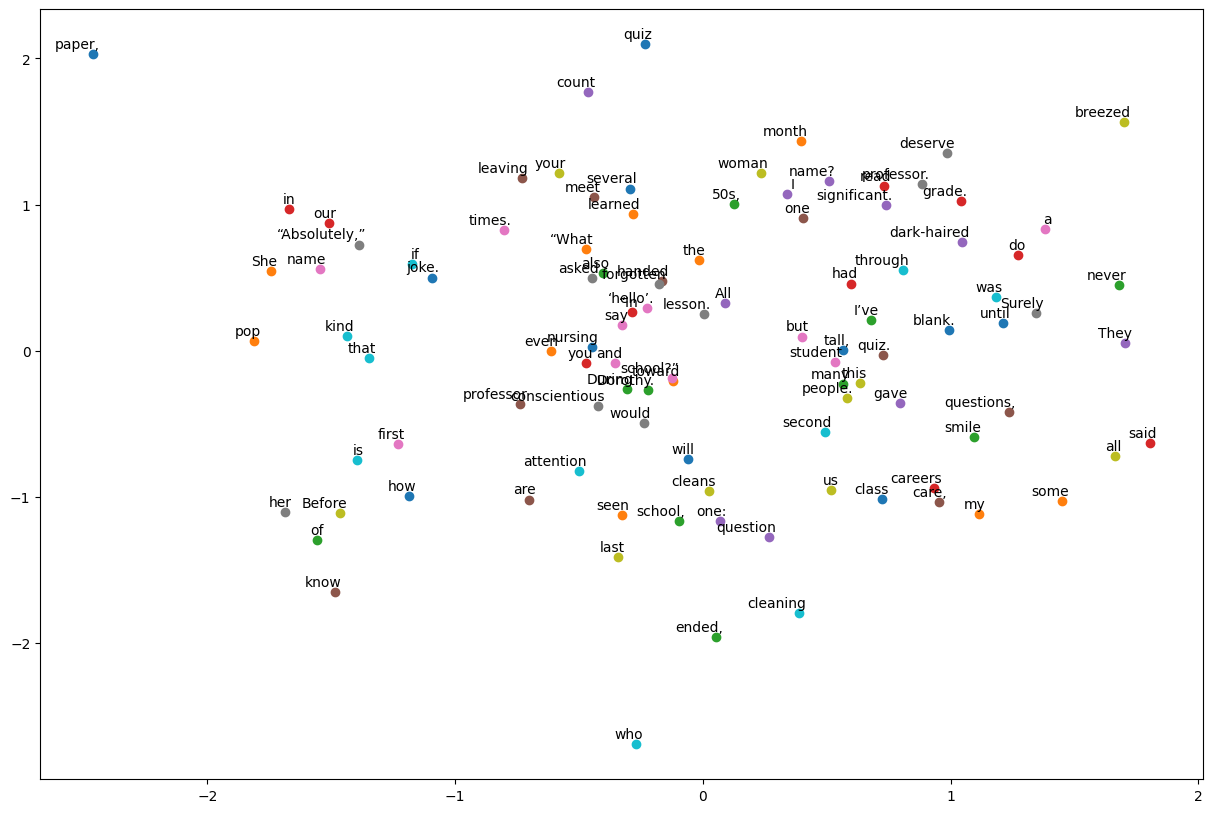

In [ ]:
plt.figure(figsize=(15,10))
for w in word_list:
    x = model.get_word_emdedding(w).detach().data.numpy()[0][0]
    y = model.get_word_emdedding(w).detach().data.numpy()[0][1]
    plt.scatter(x, y)
    plt.annotate(w, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()

In [ ]:
def CBOW_test(test_data, model):
    correct_ct = 0

    for context, target in data:
        context_vector = make_context_vector(context, word_to_ix)
        model.zero_grad()
        predicted = torch.argmax(model(context_vector), 1)

        if predicted[0] == torch.tensor([word_to_ix[target]]):
                correct_ct += 1

    print('Accuracy: {:.1f}% ({:d}/{:d})'.format(correct_ct/len(test_data)*100, correct_ct, len(test_data)))

In [ ]:
CBOW_test(data, model)

Accuracy: 100.0% (138/138)


In [ ]:
#TESTING
context = ['I’ve', 'never', 'that', 'lesson.']
context_vector = make_context_vector(context, word_to_ix)
a = model(context_vector)

In [ ]:
#Print result
print(f'Raw text: {" ".join(raw_text)}\n')
print(f'Context: {context}\n')
print(f'Prediction: {ix_to_word[torch.argmax(a[0]).item()]}')

Raw text: During my second month of nursing school, our professor gave us a pop quiz. I was a conscientious student and had breezed through the questions, until I read the last one: “What is the first name of the woman who cleans the school?” Surely this was some kind of joke. I had seen the cleaning woman several times. She was tall, dark-haired and in her 50s, but how would I know her name? I handed in my paper, leaving the last question blank. Before class ended, one student asked if the last question would count toward our quiz grade. “Absolutely,” said the professor. “In your careers you will meet many people. All are significant. They deserve your attention and care, even if all you do is smile and say ‘hello’. I’ve never forgotten that lesson. I also learned her name was Dorothy.

Context: ['I’ve', 'never', 'that', 'lesson.']

Prediction: forgotten


<div class="markdown-google-sans">

##### <strong>Continuous skip-gram model</strong>
</div>

Continuous skip-gram, or skip-gram, is similar to CBOW. Instead of predicting the target word (wt), it predicts the word surrounding it with context. The training objective is to learn representations, or embeddings, that are good at predicting nearby words.

It also takes an “n” number of words. For instance, if n=2 and the sentence is ‘the dog is playing in the park”, then the word fed into the model will be playing, and the target words will be (the, dog, is, in, the, park).


![picture](https://drive.google.com/uc?export=view&id=1cf46HT3SgS7Ovuzz64ggE_kbaM5zO8p5)

Paper: https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf

Let’s understand how a skip-gram model works with the help of code.

A skipgram model is the same as the CBOW model with one difference. The difference lies in creating the context and the target word.

Step 1: Setting target and context variable.

Since skipgram takes a single context word and n number of target variables, we just need to flip the CBOW from the previous model.

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from tqdm import tqdm

In [ ]:
def random_batch(skip_grams):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False)

    for i in random_index:
        random_inputs.append(skip_grams[i][0])  # target
        random_labels.append(skip_grams[i][1])  # context word

    return random_inputs, random_labels

In [ ]:
sentences = """During my second month of nursing school, our professor gave us a pop quiz.
I was a conscientious student and had breezed through the questions, until I read the last one:
“What is the first name of the woman who cleans the school?”  Surely this was some kind of joke.""".split()

In [ ]:
batch_size = 2 # mini-batch size
embedding_size = 10 # embedding size

word_sequence = " ".join(sentences).split()
word_list = " ".join(sentences).split()
word_list = list(set(word_list))
word_dict = {w: i for i, w in enumerate(word_list)}

voc_size = len(word_list)

def skipgram(sentences, window_size=1):
    skip_grams = []
    for i in range(window_size, len(word_sequence) - window_size):
        target = word_sequence[i]
        context = [word_sequence[i - window_size], word_sequence[i + window_size]]
        for w in context:
            skip_grams.append([target, w])

    return skip_grams

As you can see, the function is almost the same.

Here, you need to understand that when the window size is 1, we take one word before and after the target word.

When we call the function, the output looks something like this:

In [ ]:
skipgram(word_sequence)[0:2]

[['my', 'During'], ['my', 'second']]

As you can see, the target word is ‘my’ and the two words are ‘During’ and ‘second’.

Essentially, we’re trying to create a pair of words such that each pair will contain a target word. Depending on the context window, it will contain the neighboring words.

Step 2: Building the model.

The model is pretty straightforward.

In [ ]:
class skipgramModel(nn.Module):
    def __init__(self):
        super(skipgramModel, self).__init__()
        self.embedding = nn.Embedding(voc_size, embedding_size)
        self.W = nn.Linear(embedding_size, embedding_size, bias=False)
        self.WT = nn.Linear(embedding_size, voc_size, bias=False)

    def forward(self, X):
        embeddings = self.embedding(X)
        hidden_layer = nn.functional.relu(self.W(embeddings))
        output_layer = self.WT(hidden_layer)
        return output_layer

    def get_word_emdedding(self, word):
        word = torch.tensor([word_dict[word]])
        return self.embedding(word).view(1,-1)

The loss function and optimisation remains the same.

In [ ]:
model = skipgramModel()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

Once we’ve defined everything, we can train the model.

In [ ]:
for epoch in tqdm(range(150000), total=len(skipgram(word_sequence))):
    input_batch, target_batch = random_batch(skipgram(word_sequence))
    input_batch = [word_dict[w] for w in input_batch]
    target_batch = [word_dict[w] for w in target_batch]
    input_batch = torch.LongTensor(input_batch)
    target_batch = torch.LongTensor(target_batch)

    optimizer.zero_grad()
    output = model(input_batch)

    # output : [batch_size, voc_size], target_batch : [batch_size] (LongTensor, not one-hot)
    loss = criterion(output, target_batch)
    if (epoch + 1) % 10000 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

    loss.backward(retain_graph=True)
    optimizer.step()

10150it [00:19, 765.12it/s]

Epoch: 10000 cost = 0.693346


20041it [00:37, 333.02it/s]

Epoch: 20000 cost = 0.492753


30171it [00:51, 889.15it/s]

Epoch: 30000 cost = 1.468228


40133it [01:05, 882.76it/s]

Epoch: 40000 cost = 1.080968


50049it [01:18, 560.16it/s]

Epoch: 50000 cost = 0.689207


60068it [01:31, 460.61it/s]

Epoch: 60000 cost = 1.590802


70089it [01:44, 679.28it/s]

Epoch: 70000 cost = 1.418922


80083it [01:57, 811.73it/s]

Epoch: 80000 cost = 1.087348


90132it [02:11, 799.92it/s]

Epoch: 90000 cost = 1.644723


100135it [02:24, 813.40it/s]

Epoch: 100000 cost = 0.599649


110147it [02:37, 881.28it/s]

Epoch: 110000 cost = 1.462708


120094it [02:50, 878.85it/s]

Epoch: 120000 cost = 0.960978


130139it [03:04, 832.98it/s]

Epoch: 130000 cost = 2.826955


140115it [03:17, 693.40it/s]

Epoch: 140000 cost = 0.615151


150000it [03:31, 710.42it/s]

Epoch: 150000 cost = 0.917259


The skip-gram model increases computational complexity because it has to predict nearby words based on the number of neighboring words. The more distant words tend to be slightly less related to the current word.

Summary so far:

- Neural Network Language Model (NNLM) or Bengio’s model outperforms the earlier statistical model like the n-gram model.   
- NNLM also tackles the curse of dimensionality and preserves contextual, linguistic regularities and patterns through its distributed representation.
- NNLM is computationally expensive.
- Word2Vec models tackles computational complexity by removing the hidden layer and sharing the weights
- The downside of Word2Vec is it does not have a neural network which makes it hard to represent the data but the upside is that if it can be trained on a large number of data then because it is much more efficient than neural networks it is possible to compute very accurate high dimensional word vectors.
- Word2Vec has two models: CBOW and Skipgram. The former is faster than the latter.

In [ ]:
def Skipgram_test(test_data, model):
    correct_ct = 0

    for i in range(len(test_data)):
        input_batch, target_batch = random_batch(test_data)
        input_batch = [word_dict[w] for w in input_batch]
        target_batch = [word_dict[w] for w in target_batch]
        input_batch = torch.LongTensor(input_batch)
        target_batch = torch.LongTensor(target_batch)

        model.zero_grad()
        _, predicted = torch.max(model(input_batch), 1)

        if predicted[0] == target_batch[0]:
                correct_ct += 1

    print('Accuracy: {:.1f}% ({:d}/{:d})'.format(correct_ct/len(test_data)*100, correct_ct, len(test_data)))

In [ ]:
Skipgram_test(skipgram(word_sequence), model)

Accuracy: 37.5% (36/96)


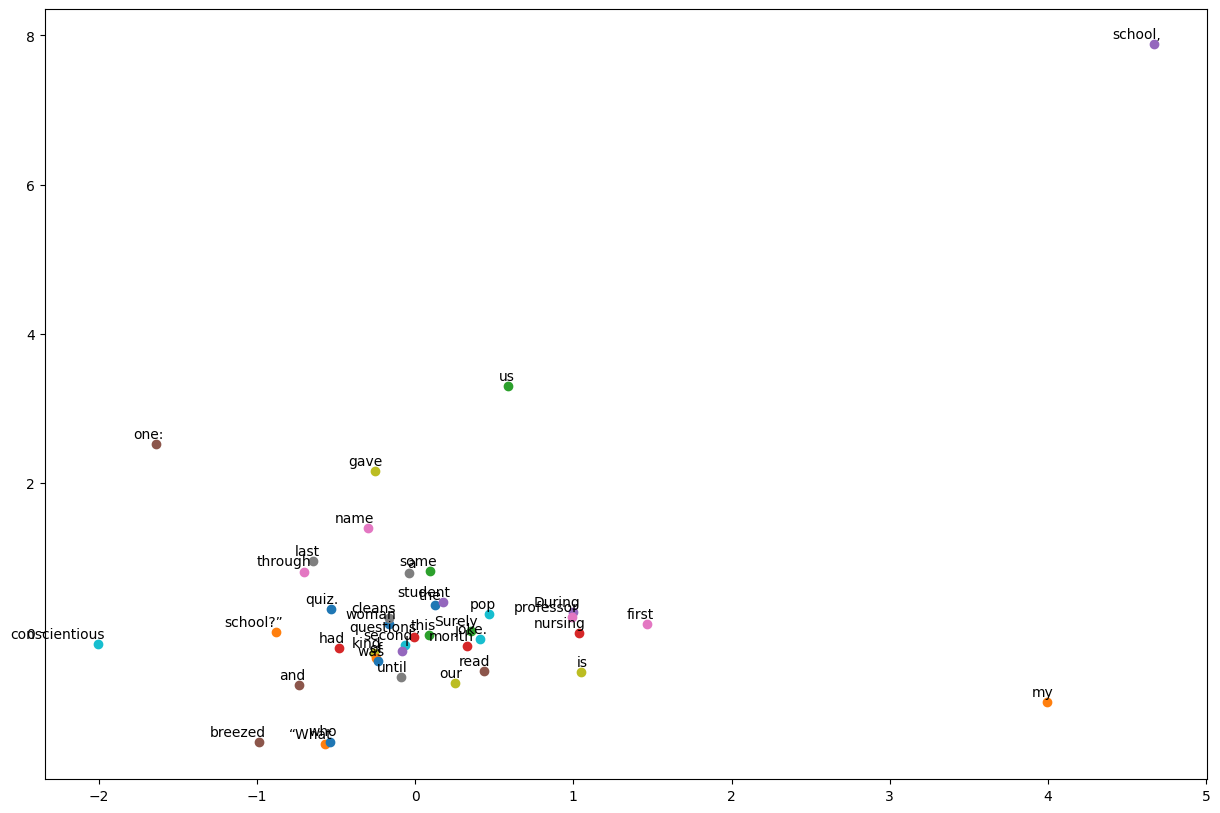

In [ ]:
plt.figure(figsize=(15,10))
for w in word_list:
    x = model.get_word_emdedding(w).detach().data.numpy()[0][0]
    y = model.get_word_emdedding(w).detach().data.numpy()[0][1]
    plt.scatter(x, y)
    plt.annotate(w, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()

In [ ]:
pred = "During".split()

In [ ]:
word_dict_inverse = {i:w for w, i in word_dict.items()}

In [ ]:
model_pred = []
e = 0
model_pred.append(pred[0])

while e<6:
    word = word_dict_inverse[torch.argmax(model(torch.LongTensor([word_dict[model_pred[-1]]]))).item()]
    model_pred.append(word)
    e+=1

' '.join(model_pred)

'During the quiz. pop quiz. pop quiz.'

Comment on the results of this section.

<font color='blue'>Answer:</font>

- When applying **CBOW**, we notice a 100% accuracy, but upon inspecting the cluster, the word paper is disconnected from its context. Nonetheless, during testing, we obtain the correct answer. It's crucial to highlight, as in the previous section, that the model is trained on a very small database.

- On the other hand, with **Skip-Gram**, as mentioned by the author, this task is more challenging as it aims to predict context (which involves many more words). Therefore, it's trained for more epochs, yet achieving only a 37% accuracy. As we can observe, it doesn't fully predict the context accurately.

<div class="markdown-google-sans">

### <strong>4.4 Visualizing Word2Vec Word Embeddings using t-SNE</strong>
</div>

Everyone perceives texts in a unique way, regardless of whether this person reads news on the Internet or world-known classic novels. This also applies to a variety of algorithms and machine learning techniques, which understand texts in a more mathematical way, namely, using high-dimensional vector space.
This part of the practice is devoted to visualizing high-dimensional Word2Vec word embeddings using t-SNE. The visualization can be useful to understand how Word2Vec works and how to interpret relations between vectors captured from your texts before using them in neural networks or other machine learning algorithms. As a training data, we will use articles from Google News and classical literary works by Leo Tolstoy, the Russian writer who is regarded as one of the greatest authors of all time.
We go through word embeddings calculation using Word2Vec, and finally, proceed to word vectors visualization with t-SNE in 2D space.




<div class="markdown-google-sans">

#### <strong>4.4.1 Visualizing Similar Words from Google News</strong>
</div>

To begin with, we should obtain vector representations of words. For this purpose, Word2vec is selected, that is, a computationally-efficient predictive model for learning multi-dimensional word embeddings from raw textual data. The key concept of Word2Vec is to locate words, which share common contexts in the training corpus, in close proximity in the vector space in comparison with others.

As an input data for visualization, we will use articles from Google News and a novel by Leo Tolstoy. Pre-trained vectors trained on part of Google News dataset (about 100 billion words) was published by Google at the official page, so we will use it. The data is already in the shared folder. It can also be downloaded from here: https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit


In [ ]:
# Install necessary libraries
!pip install gensim

In [ ]:
import gensim
import nltk
model_gn = gensim.models.KeyedVectors.load_word2vec_format(additional_data_path+'GoogleNews-vectors-negative300-001.bin', binary=True)

T-SNE is quite useful in case it is necessary to visualize similarity between objects which are located into multidimensional space. With a large dataset, it is becoming more and more difficult to make an easy-to-read t-SNE plot, so it is common practice to visualize groups of the most similar words.
Let us select a few words from the vocabulary of the pre-trained Google News model and prepare word vectors for visualization.

In [ ]:
keys = ['Paris', 'Python', 'Sunday', 'Tolstoy', 'Twitter', 'bachelor', 'delivery', 'election', 'expensive',
        'experience', 'financial', 'food', 'iOS', 'peace', 'release', 'war']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    # Get top 15 similar words to the key-word in the model dictionary
    for similar_word, _ in model_gn.most_similar(word, topn=15):
        words.append(similar_word)
        embeddings.append(model_gn[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

# Cluster the data using TSNE
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
print("Data shape before TSNE")
print("Number of input words: "+str(n))
print("Number of top N words we want extract: "+str(m))
print("Word Embedding Vector size (feature vector): "+str(k))
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)
n,m, k = embeddings_en_2d.shape
print("Data shape after TSNE")
print("Number of input words: "+str(n))
print("Number of top N words we want extract: "+str(m))
print("Word Embedding Vector size (feature vector): "+str(k))

Data shape before TSNE
Number of input words: 16
Number of top N words we want extract: 15
Word Embedding Vector size (feature vector): 300
Data shape after TSNE
Number of input words: 16
Number of top N words we want extract: 15
Word Embedding Vector size (feature vector): 2


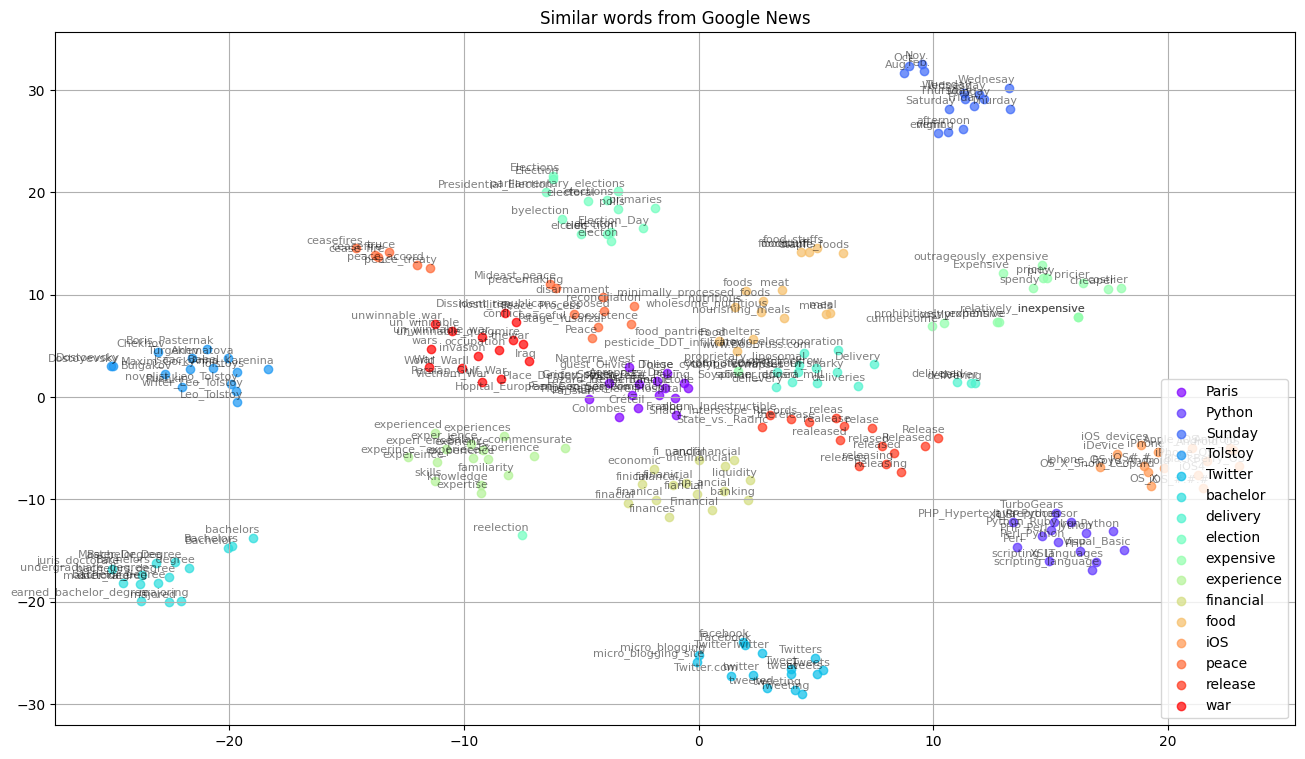

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=[color], alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7)

Comment on the results.

<font color='blue'>Answer:</font>

In the following section we have selected 16 seed words, like *Paris*, *Python*, *Sunday*, etc. We use the 16 words to explore semantic similarities within the Word2Vec model (trained on the Google News). For each seed word, we retrieve the top 15 most similar words. These mikiar words are chosen because they share semantic or contextual similarities.

At last, we apply t-SNE to reduce the dimensionality of the word embeddings to 2 dimensions, which facilitates the visualization. Words that are close together on the plot are contextually related, for example *professor*, *student*, etc. On the other hand, distant words are less related contextually. We can conclude that the semantic relationships are captured correctly, where each of the 16 groups have related words within them.

<div class="markdown-google-sans">

#### <strong>4.4.2 Visualizaing Word2Vec Vectors from Leo Tolstoy Anna Karenina book</strong>
</div>

To start with, it's necessary to download pretrained Punkt Sentence Tokenizer, which divides a text into a list of sentences considering abbreviation words, collocations, and words, which are probably indicates start or end of sentences. As done in 4.1.3.

Define some methods to perform the data cleaning over the book and the training process of words embeddings for this book.

<font color='blue'>Answer:</font>

- To perform **data cleaning**, as seen in other sections we can apply the following techniques:
   - *Tokenization:* We split the text into tokens considering the context. Very good processing the punctuation, contractions, etc.
   - *Lowercasing:* We convert all the words to lowercase, we might lose some context.
   - *Stemming:* We reduce the words to their root.

- To perform the training of **word embeddings** we can apply the following techniques:  
  - *CBOW and Skip-Grams:* Implemented with Word2Vec and trained using a neural network. The first onehas the objective of predicting a target word, and the second one, the context.

In [12]:
import re
import codecs
import multiprocessing
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.manifold import TSNE
import numpy as np
%matplotlib inline

def preprocess_text(text):
    text = re.sub('[^a-zA-Zа-яА-Я1-9]+', ' ', text)
    text = re.sub(' +', ' ', text)
    return text.strip()


def prepare_for_w2v(filename_from, filename_to, lang):
    raw_text = codecs.open(filename_from, "r", encoding='windows-1251').read()
    with open(filename_to, 'w', encoding='utf-8') as f:
        for sentence in nltk.sent_tokenize(raw_text, lang):
            print(preprocess_text(sentence.lower()), file=f)


def train_word2vec(filename):
    data = gensim.models.word2vec.LineSentence(filename)
    return Word2Vec(data, vector_size=200, window=5, min_count=3, workers=multiprocessing.cpu_count())


Train new model with data from the book. (Take your time!!!)

In [13]:
# prepare_for_w2v(additional_data_path+'Anna_Karenina_by_Leo_Tolstoy_(ru).txt', additional_data_path+'train_anna_karenina_ru.txt', 'russian')
model_ak = train_word2vec(additional_data_path+'train_anna_karenina_ru.txt')

In [14]:
words_ak = []
embeddings_ak = []
for word in list(model_ak.wv.key_to_index):
    embeddings_ak.append(model_ak.wv[word])
    words_ak.append(word)

tsne_ak_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_ak_2d = tsne_ak_2d.fit_transform(np.array(embeddings_ak))

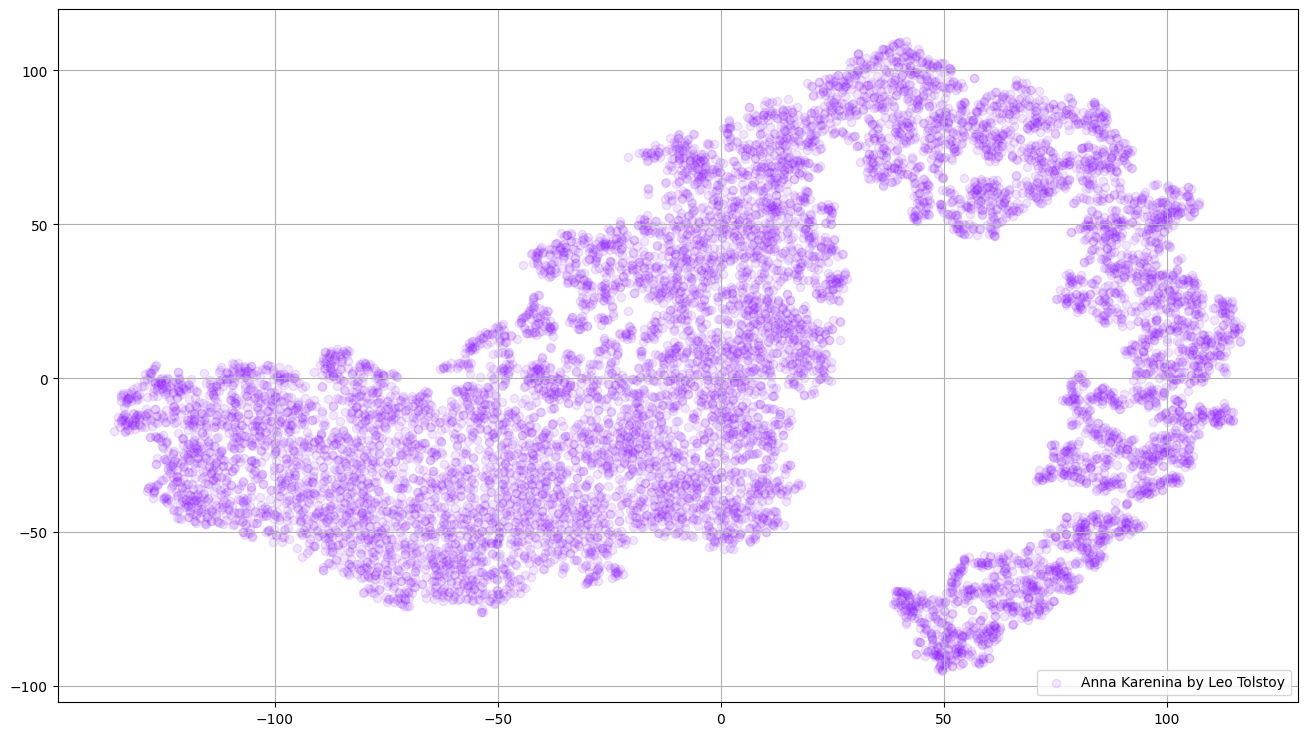

In [15]:
def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)

tsne_plot_2d('Anna Karenina by Leo Tolstoy', embeddings_ak_2d, a=0.1)

Comment on the results.

<font color='blue'>Answer:</font>

In this section we first preprocessed the text to remove certain characters and extra whitespaces. Each sentence is then tokenized and converted to lowercase. We then train the Word2Vec model on the preproceseed text. Also, same as the previous section, we aplly t-SNE to reduce the diomensionality of the learned word embedding. Lastly, we plot the distribution of word embeddings learned from the text.

<div class="markdown-google-sans">

### <strong>4.5 Text Search Engine</strong>
</div>





The goal of this practical exercise is to build a simple Text Search Engine based on a set of text features that you have already studied such as: Bag of Words, Td-idf or the Word Embedding.

To do so, we will use a given dataset, we will extract these features from it and finally we will select a simple strategy to retrieve similar documents.

In [16]:
# import your libraries
import re
import random
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim.models import Word2Vec
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

<div class="markdown-google-sans">

#### <strong>4.5.1 Load the Dataset</strong>
</div>

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

In [17]:
bunch = fetch_20newsgroups(remove='headers')
# What type of data is our bunch object?
type(bunch)

sklearn.utils._bunch.Bunch

In [18]:
# Basically, a bunch is an specific Python dictionary-like object
print(bunch.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [19]:
# Let's try to check what "data" is
print(type(bunch.data))

<class 'list'>


In [20]:
# Let's check the length
print(len(bunch.data))

11314


In [21]:
# What are the meaning o the target names?
print(bunch.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


Then, it seems that bunch.data is a list with a collection of 11314 texts, therefore we can work with this object as a list, which makes things easier to access to the information. Let's see an example of one of the values availale in buch.data.

In [22]:
# Let's try to see an example of the dataset
index_data = 10
print(bunch.data[index_data])

I have a line on a Ducati 900GTS 1978 model with 17k on the clock.  Runs
very well, paint is the bronze/brown/orange faded out, leaks a bit of oil
and pops out of 1st with hard accel.  The shop will fix trans and oil 
leak.  They sold the bike to the 1 and only owner.  They want $3495, and
I am thinking more like $3K.  Any opinions out there?  Please email me.
Thanks.  It would be a nice stable mate to the Beemer.  Then I'll get
a jap bike and call myself Axis Motors!

-- 
-----------------------------------------------------------------------
"Tuba" (Irwin)      "I honk therefore I am"     CompuTrac-Richardson,Tx
irwin@cmptrc.lonestar.org    DoD #0826          (R75/6)
-----------------------------------------------------------------------



Print some other elements of the list.

<font color='blue'>Answer:</font>

In [24]:
index_data = 50
print(bunch.data[index_data])

I am trying to write an image display program that uses
the MIT shared memory extension.  The shared memory segment
gets allocated and attached to the process with no problem.
But the program crashes at the first call to XShmPutImage,
with the following message:

X Error of failed request:  BadShmSeg (invalid shared segment parameter)
  Major opcode of failed request:  133 (MIT-SHM)
  Minor opcode of failed request:  3 (X_ShmPutImage)
  Segment id in failed request 0x0
  Serial number of failed request:  741
  Current serial number in output stream:  742

Like I said, I did error checking on all the calls to shmget
and shmat that are necessary to create the shared memory
segment, as well as checking XShmAttach.  There are no
problems.

If anybody has had the same problem or has used MIT-SHM without
having the same problem, please let me know.

By the way, I am running OpenWindows 3.0 on a Sun Sparc2.

Thanks in advance--
John C.





<div class="markdown-google-sans">

#### <strong>4.5.2 Split the Bunch object into train and test</strong>
</div>

Now, let's split our bunch object into two well-known subsets: training and testing sets.

In [25]:
# Load training and testing sets
X_train = fetch_20newsgroups(subset='train', remove='headers')
X_test = fetch_20newsgroups(subset='test', remove='headers')

In [26]:
# Check the shape of the data
print("Nº of Samples in X_train: {}\nNº of Samples in X_test: {}".format(len(X_train.data), len(X_test.data)))

Nº of Samples in X_train: 11314
Nº of Samples in X_test: 7532



<div class="markdown-google-sans">

#### <strong>4.5.3 Extract Text Features</strong>
</div>



<div class="markdown-google-sans">

##### <strong>Bag of Words</strong>
</div>

What exactly is the BoW?

Basically, it’s a collection of words to represent a sentence with word count and mostly disregarding the order in which they appear. The idea is to create simple vectors from words to be used as inputs when training and evaluating Machine or Deep Learning models.

An important consideration when using this approach is the vocabulary length which will depend on your dataset. Thus the input of your vector will be proportional to your vocabulary length. Therefore, the larger the vocabulary, the larger your input vector. Additionally this fact will also imply a level of sparsity in your input vector which must be taken into consideration when training your final model.  

In [27]:
# Let's create our BoW model!
bow_model = CountVectorizer()
bow_model.fit(X_train.data)

CountVectorizer()

In [28]:
# Let's transform one training example into a BoW model
tr_sample = 0
bow_sample = bow_model.transform([X_train.data[tr_sample]]).todense()
print(bow_sample.shape)

(1, 125145)


In [29]:
# Let's have a look to the result
print("BoW sample: ", bow_sample)

BoW sample:  [[0 0 0 ... 0 0 0]]


In [30]:
# Let's compute a sparsity level to check the percentage of NON-ZERO entries
sparsity = 1 - (np.count_nonzero(bow_sample))/(bow_sample.shape[1])
print("Sparsity level: ", sparsity)

Sparsity level:  0.9994326581165848


As we can see above, the sparsity is almost 1, which means that most of the entries are indeed zero for a given sentence. Finally, let's compute our feature vector for each entry of the training set.

In [31]:
# Obtain the feature vector for our training set
bow_features = bow_model.transform(X_train.data).todense()
print(bow_features.shape)

(11314, 125145)



<div class="markdown-google-sans">

##### <strong>Tf-idf</strong>
</div>
Let's try to extract some text features such as the so-called Tf-idf. More specifically, **Tf-idf** stands for **Term Frequency-Inverse Document Frequency**. You can see The tf-idf as a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus.

In [32]:
# Number of features to be extracted
max_features= 10000

# Build the model
tfidf_model = TfidfVectorizer(max_features=max_features)
tfidf_model

TfidfVectorizer(max_features=10000)

In [33]:
# Transform the training data
tfidf_features = tfidf_model.fit_transform(X_train.data)
print("TF-idf Feature Shape: {}".format(tfidf_features.shape))

TF-idf Feature Shape: (11314, 10000)


As we can observe, now we have a more compact representation of the data which is provided by the maximum number of features that are computed in the TFidf procedure.

In [34]:
# Retrieve a sample
tfidf_sample = tfidf_features[tr_sample, :]
print(tfidf_sample.shape)

# Print the type
print(type(tfidf_sample))

(1, 10000)
<class 'scipy.sparse._csr.csr_matrix'>


In [35]:
# Convert csr_matrix to numpy
tfidf_sample = tfidf_sample.toarray()
print(tfidf_sample.shape)

# Print the type
print(type(tfidf_sample))

(1, 10000)
<class 'numpy.ndarray'>


In [36]:
# Let's have a look to the result
print("Tfidf sample: ", tfidf_sample)

Tfidf sample:  [[0. 0. 0. ... 0. 0. 0.]]


In [37]:
# Let's compute a sparsity level to check the percentage of NON-ZERO entries
sparsity = 1 - (np.count_nonzero(tfidf_sample))/(tfidf_sample.shape[1])
print("Sparsity level: ", sparsity)

Sparsity level:  0.9934




What does this result mean?

<font color='blue'>Answer:</font>

This last result indicates the sparsity level, which is the proportion of zeros in the matrix. We are obtaining a high sparsity level because there are a lot of unique terms. In other words, the 99.34% of the entrief in the TF-IDF are zero, which means that most of the terms in the vocabulary do not occur frequently.

<div class="markdown-google-sans">

##### <strong>Word2Vec</strong>
</div>






Finally, we are going to use another potential feature that can be computed from the text: the so-called Word2Vec representation, that has been presented before. Basically, Word2vec is one of the most popular method to learn and represent word embeddings using a two-layer neural network. More specifically, its input consists in a raw text corpus whereas its output is a set of vectors that better represents the text input.

To extract our word embedding representation, we are going to use a poerful NLP library named as **Gensim**.

In [38]:
# Preprocess text
def tokenize(sentence):
    remove_dots = re.sub("[.]", "", sentence.lower())
    return re.findall("[A-Za-z]{2,}", remove_dots)

def get_sentences(X):
    """Given a set of data, retrieve the senteces."""
    sentences = [tokenize(sentence) for sentence in X.data]
    return sentences

In [39]:
# Let's determine the setences of our training set
sentences_train = get_sentences(X=X_train)
# Let's check how many sentences do we have
print(len(sentences_train))

11314


In [40]:
# Let's see an example of our sentences object
sent_sample = random.sample(sentences_train, 1)
print(sent_sample[0])

['in', 'article', 'apr', 'ulkyvxlouisvilleedu', 'pjtier', 'ulkyvxlouisvilleedu', 'writes', 'if', 'the', 'braves', 'continue', 'to', 'average', 'runs', 'game', 'then', 'is', 'where', 'they', 'will', 'finish', 'tierney', 'so', 'if', 'the', 'braves', 'run', 'production', 'falls', 'to', 'per', 'game', 'which', 'is', 'certainly', 'where', 'it', 'headed', 'if', 'they', 're', 'lucky', 'does', 'that', 'mean', 'they', 'll', 'finish', 'first', 'econdukeedu', 'fls', 'econdukeedu', 'fls', 'econdukeedu', 'fls', 'econduke', 'to', 'my', 'correspondents', 'my', 'email', 'has', 'been', 'changed', 'my', 'new', 'address', 'is', 'fls', 'econdukeedu', 'if', 'mail', 'bounces', 'try', 'fls', 'raphaelacpubdukeedu']


Before going deeper to the word2vec model, let's review the needed parameters that we will employ:

- **size**: The number of dimensions of the embeddings.
- **window**: The maximum distance between a target word and words around the target word. The default window is 5.
- **min_count**: The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.
- **workers**: The number of partitions during training and the default workers is 3.

Moreover, the training algorithm that is used is the CBOW. The **input of the model will be the collection of sentences from our training set**.

In [41]:
# Build and train the word2Vec model using our sentences as input
min_count = 5
size = 100
seed = 125
workers = 3
window = 5
filename = "word2vec_newsgroups.bin"

# Build and training the model
w2v_model = Word2Vec(sentences_train, vector_size=size, min_count=min_count,
                 seed=seed, workers=workers, window=window)
# Save the model into a binary file
w2v_model.save(filename)

In [42]:
# This will make the model much more memory-efficient:
w2v_model.init_sims(replace=True)

<ipython-input-42-5db0696a5442>:2: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)


In [43]:
# Let's take a look to the vocabulary
words = list(w2v_model.wv.key_to_index)
print(words)

['the', 'to', 'of', 'ax', 'and', 'in', 'is', 'that', 'it', 'for', 'you', 'this', 'on', 'be', 'are', 'not', 'have', 'with', 'as', 'or', 'if', 'but', 'they', 'was', 'can', 'from', 'by', 'at', 'an', 'there', 'what', 'my', 'all', 'will', 'we', 'one', 'would', 'do', 'he', 'about', 'writes', 'so', 'has', 'your', 'no', 'any', 'me', 'article', 'some', 'who', 'out', 'which', 'people', 'don', 'like', 'more', 'when', 'just', 'their', 'were', 'up', 'other', 'know', 'only', 'how', 'get', 'them', 'max', 'than', 'had', 'been', 'his', 'think', 'also', 'use', 'does', 'time', 'then', 'these', 'should', 'new', 'good', 'us', 'could', 'am', 'well', 'because', 'even', 'very', 'may', 'now', 'into', 'why', 'apr', 'see', 'two', 'way', 'first', 'god', 'many', 'make', 'much', 'most', 'such', 'those', 'right', 'here', 'where', 'say', 're', 'system', 've', 'want', 'our', 'said', 'being', 'anyone', 'used', 'its', 'go', 'same', 'did', 'over', 'after', 'work', 'something', 'need', 'too', 'him', 'problem', 'really', '

In [44]:
# Print the lenght of the vocabulary
print("Vocabulary length: ", len(words))

Vocabulary length:  26187


In [45]:
# extract all vectors
word2vec_features = w2v_model.wv[w2v_model.wv.key_to_index]
word2vec_features.shape

(26187, 100)

We have studied how to transform words into vectors using the word2vec representation. Now, in order to use this feature in the text search scenario, we would need to compute a feature vector for the whole sentence representation. To do so, we will use two main approaches:

- Compute the average of the word2vec for the words available in our vocabulary
- Combine the tfidf feature with the word2vec

In [46]:
def compute_w2v_average(sentence, w2v_model):
    words = tokenize(sentence.lower())
    sum_w2v = 0
    count_w2v = 0
    for word in words:
        # Check if the word is in our vocabulary
        if word in w2v_model.wv.key_to_index:
            sum_w2v += w2v_model.wv[word]
            count_w2v += 1
    if count_w2v:
        return sum_w2v/count_w2v

In [47]:
def compute_w2v_tfidf(sentence, w2v_model, tfidf_model):
    sentence_tfidf = np.array(tfidf_model.transform([sentence]).todense())
    words = tokenize(sentence.lower())
    sum_w2v = 0
    count_w2v = 0
    for word in words:
        # Check if the word is in our vocabulary
        if word in w2v_model.wv.key_to_index and word in tfidf_model.vocabulary_:
            index = tfidf_model.vocabulary_[word]
            word_tfidf = sentence_tfidf[0][index]
            word_w2v = w2v_model.wv[word]
            sum_w2v += word_w2v * word_tfidf
            count_w2v += 1
    if count_w2v:
        return sum_w2v/count_w2v

In [48]:
# Let's load a random example of the test set
sentence_test = X_test.data[0]
print(sentence_test)


 I am a little confused on all of the models of the 88-89 bonnevilles.
I have heard of the LE SE LSE SSE SSEI. Could someone tell me the
differences are far as features or performance. I am also curious to
know what the book value is for prefereably the 89 model. And how much
less than book value can you usually get them for. In other words how
much are they in demand this time of year. I have heard that the mid-spring
early summer is the best time to buy.

			Neil Gandler



In [49]:
# Load the Word2vec model
w2v_model = Word2Vec.load(filename)

# extract the word2vec average feature
X_w2v_average = np.array(compute_w2v_average(sentence_test, w2v_model))
print(X_w2v_average.shape)

(100,)


In [50]:
# Display the feature word2vec average
print(X_w2v_average)

[-0.3245776  -0.97711146  0.23205383 -0.36901137 -0.453453   -0.34756446
  0.4680726  -1.0717568   0.0325831   0.4466503   0.5144615   0.77566355
  0.9926293  -0.40111515  0.12092678 -0.8335753   0.20952271  0.03196894
 -0.32929483 -0.42614922 -0.06394403 -0.04808268 -0.53019714  0.7460316
 -0.6384935  -0.3386324  -0.50551254 -0.18440841  0.7696931  -0.1591033
 -0.37347144  0.44484535 -0.09380959  0.39722875  0.2686058  -0.8405658
  0.03411233 -0.53353846  0.14992006 -0.0908927   0.11706802 -0.4649755
 -0.96562517  0.14453419  0.3556821  -0.23438598  0.5374751  -0.4023529
  0.133674   -0.46691528  0.7137276  -0.65390867 -0.33323696  0.49629906
 -0.7099902   0.05290818 -0.17673133 -0.43632033  0.4997021   0.27764234
 -0.8451711   0.51175445 -0.9735514   0.2744911   0.03286736  0.32793567
 -0.13441658  1.0971562   0.22346586 -0.20763002 -0.03044165 -0.20605278
  1.2364637   0.32732686 -0.1164456   0.6008306  -0.4679128   0.28833988
  0.327982    0.11825769  0.02003428 -0.29137036 -0.5844

In [51]:
x_w2v_tfidf = np.array(compute_w2v_tfidf(sentence_test, w2v_model, tfidf_model))
print(x_w2v_tfidf.shape)

(100,)


In [52]:
# Display the feature word2vec average + tf-idf
print(x_w2v_tfidf)

[-6.50952682e-02 -1.21661745e-01  2.27051843e-02 -1.69317909e-02
 -6.97244555e-02 -3.96680087e-02  5.68545796e-02 -1.50637552e-01
 -2.07589045e-02  5.35729975e-02  6.01432212e-02  1.00599065e-01
  1.07848771e-01 -5.04083186e-02 -9.39317234e-03 -7.90813640e-02
  2.84572635e-02 -1.29759805e-02 -3.08580697e-02 -6.77482709e-02
  1.34768691e-02 -2.07388140e-02 -5.34634478e-02  1.03328429e-01
 -7.98959360e-02 -2.91516371e-02 -7.12805986e-02 -1.00677088e-02
  8.68491605e-02 -1.79897174e-02 -4.65150438e-02  2.07001772e-02
  1.75101925e-02  1.88446958e-02  3.46126221e-02 -1.04996055e-01
  1.99929252e-02 -6.35926649e-02  1.53235579e-02  8.04687501e-04
  1.06750643e-02 -6.10233732e-02 -1.25865340e-01  3.01857777e-02
  3.01037133e-02 -1.31168943e-02  6.35824800e-02 -5.12935892e-02
  8.34202580e-03 -3.96618955e-02  9.81412977e-02 -9.24797505e-02
 -3.98295186e-02  7.47563690e-02 -8.72643143e-02 -2.67922156e-03
 -2.83505097e-02 -3.82090881e-02  5.25859781e-02  1.55693311e-02
 -9.14578959e-02  5.78465

<div class="markdown-google-sans">

#### <strong>4.5.4 Text Search Engine</strong>
</div>

Now that we have implemented a set of text features, let's try to build a simple text engine based on them.

In [53]:
"""
Main Functionalities for extracting features
"""
def extract_w2v_tfidf_features(X, w2v_model, tfifd_model):
    X_features = np.array([])
    non_valid_idx = []
    data = X.data
    for i, s in enumerate(data):
        x = np.array(compute_w2v_tfidf(s, w2v_model, tfifd_model))
        if len(x.shape)>0:
            x = x[np.newaxis, :]
            if i == 0:
                X_features = x
            else:
                X_features = np.concatenate([X_features, x], axis=0)
        else:
            non_valid_idx.append(i)
    return X_features

def extract_w2v_average_features(X, w2v_model):
    # Extract the feature for training ...
    X_features = np.array([])
    non_valid_idx = []
    data = X.data
    for i, s in enumerate(data):
        x = np.array(compute_w2v_average(s, w2v_model))
        if len(x.shape)>0:
            x = x[np.newaxis, :]
            if i == 0:
                X_features = x
            else:
                X_features = np.concatenate([X_features, x], axis=0)
        else:
            non_valid_idx.append(i)
    return X_features

def get_X_features(model, X, bow_model, tfidf_model, w2v_model):
    """Calculate features for a given X input
    """
    x_features = None
    print("Extracting features using {} model".format(model.title()))
    if model == "tfidf":
        x_features = tfidf_model.transform(X.data)
    elif model == "bow":
        x_features = bow_model.transform(X.data)
    elif model == "w2v_tfidf":
        x_features = extract_w2v_tfidf_features(X, w2v_model, tfidf_model)
    else:
        x_features = extract_w2v_average_features(X, w2v_model, tfidf_model)
    return x_features

def plot_results(input_texts, D, N):
    """input, distance and neighboors results
    """
    for input_text, distances, neighbors in zip(input_texts, D, N):
        print("Input text = ", input_text[:200], "\n")
    for dist, neighbor_idx in zip(distances, neighbors):
        print("Distance = ", dist, "Neighbor idx = ", neighbor_idx)
        print(bunch.data[neighbor_idx][:200])
        print("-"*200)
    print("="*200)
    print()

In [54]:
# You can select which features use from: "tfidf", "bow" or "w2v_tfidf"
model = "tfidf"
X_train_features = get_X_features(model=model, X=X_train, bow_model=bow_model,
                                  tfidf_model=tfidf_model, w2v_model=w2v_model)
X_test_features = get_X_features(model=model, X=X_test, bow_model=bow_model,
                                  tfidf_model=tfidf_model, w2v_model=w2v_model)

Extracting features using Tfidf model
Extracting features using Tfidf model


In [55]:
print(X_train_features.shape)
print(X_test_features.shape)

(11314, 10000)
(7532, 10000)


For this purpuse we are going to use a simple Nearest Neighboors method in order to retrieve similar documents from a given database.

In [56]:
# Build a simple ML model to make the query search
knn = NearestNeighbors(n_neighbors=10, metric='cosine')
knn

NearestNeighbors(metric='cosine', n_neighbors=10)

In [57]:
# Fit the model
knn.fit(X_train_features)

NearestNeighbors(metric='cosine', n_neighbors=10)

In [58]:
# Test a new sample
index_sample = random.sample([i for i in range(X_test_features.shape[0])], 1)[0]
input_test_sample = X_test.data[index_sample]

input_sample = X_test_features[index_sample, :]
if model == "w2v_tfidf":
    input_sample = input_sample.reshape(1, -1)
input_sample.shape


(1, 10000)

In [59]:
# Let's retrieve the results of the most similar neighboors as well as the distances!!
D, N = knn.kneighbors(input_sample, n_neighbors=5, return_distance=True)

In [60]:
plot_results([input_test_sample], D, N)

Input text =  Turkish Historical Revision in auto-scribal residue <9305091835@zuma.UUCP>, 
sera@zuma.UUCP (Serdar Argic), posted the following:

[(*] Source: "Adventures in the Near East" by A. Rawlinson, Jonathan  

Distance =  0.4854928306094507 Neighbor idx =  6313
In 1941, while the Jews were being assembled for their doom in the Nazi
concentration camps, the Nazi Armenians in Germany formed the first
Armenian battalion to fight alongside the Nazis. In 1943, th
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Distance =  0.49985631475220205 Neighbor idx =  70
In article <C4zvvG.50D@unix.amherst.edu> nwbernst@unix.amherst.edu (Neil Bernstein) writes:

: Pardon me? Here is to an amherst-clown:
: 
: "Your three chiefs, Dro, Hamazasp and Kulkhandanian are the 
-----------------------------------------------------------------------------

Comment on the results of this section.

<font color='blue'>Answer:</font>

Once we have trained the Word2Vec model, we calculate the average representation of the sentences and the TF-IDF scores. We then use a KNN model with cosine distances, to randomly select a test sample, and keep the 5 most similar neighbors based on their Word2Vec representations.

As results we have the input text, for example the *Turkish Historical Revision*, we also have the distances and neihbor indices, representing the cosine distance between the input text and the neighbor. We also represent the neighbor text. In the case of the *Turkish Historical Revision*. the neighbor text is about the 2nd World War, which is not very related to the input text, but a little as it is a historical event.

<div class="markdown-google-sans">

### <strong>4.6 Vectorization & Embeddings [ELMo, BERT, GPT]</strong>
</div>

#### Dynamic Embeddings

Deep contextual embeddings and sentence/word vectors falls under dynamic embeddings. These embeddings are current SOTA and these are deep contextual embeddings ,implying that there is a need for robust Neural NEtwork models for these architectures.

Since we will not be going into depth about the model architectures of each of these, we will be brushing over the concetps required for creating these embedding models. The following models lie within the scope of these embeddings:

- [ELMO](https://arxiv.org/abs/1802.05365)
- [Transformers](https://arxiv.org/abs/1706.03762)

Both these papers are essentially important for their contributions to contextual deep embeddings.

<div class="markdown-google-sans">

#### <strong>4.6.1 ELMO - Brief Overview</strong>
</div>


ELMO is a contextualised deep embedding model, which is dynamic and semi supervised.
Word representations are functions of entire input sequence,and are computed on top of 2 bidirectional LSTM with character convolutions. The standard architecture for ELMO is as follows:

<img src="https://jalammar.github.io/images/Bert-language-modeling.png">

The most important aspect is tasks specific combinations of intermediate layer representations of the Bilstm which allows retention of the words/long sentence sequences in the embedding space .

[Jay's blog provides a good walkthrough](http://jalammar.github.io/illustrated-bert/).

Bidirectional transfer learning (BiLSTM architecture) is important in this aspect.

<img src="http://jalammar.github.io/images/elmo-forward-backward-language-model-embedding.png">


<div class="markdown-google-sans">

##### <strong>Using ELMO Embeddings</strong>
</div>

Traditionally, Elmo embeddings could be used from [tensorflow hub](https://tfhub.dev/). The original implementation can be found in [AllenNLP](https://allennlp.org/elmo). Some resources for using ELMO :

- [TFHub](https://tfhub.dev/google/elmo/1)
- [ELMO-Good article](https://www.analyticsvidhya.com/blog/2019/03/learn-to-use-elmo-to-extract-features-from-text/)
- [ELMO-article](https://towardsdatascience.com/elmo-contextual-language-embedding-335de2268604)


In [61]:
import tensorflow_hub as hub
import tensorflow as tf
#Elmo
elmo = hub.load("https://tfhub.dev/google/elmo/3").signatures["default"]
# Provide input tensor and create embeddings
input_tensor = ["Hello im Alberto and im show you how to use ELMO"]
embeddings_tensor = elmo(tf.constant(input_tensor))["elmo"]  #, signature="default", as_dict=True)

embeddings_tensor.shape

TensorShape([1, 11, 1024])

<div class="markdown-google-sans">

#### <strong>4.6.2 Transformers</strong>
</div>


<img src="https://static01.nyt.com/images/2007/07/02/arts/Trans1600.jpg?quality=75&auto=webp&disable=upscale">


We come to Transformer Embeddings  for which the most important aspect is the Transformer architecture. Since we will be diving in depth into architectures in the Machine LEarning Training session (model building), it is safe to have a glimpse of a traditional Transformer Architecture.

<img src="https://i0.wp.com/esciencegroup.com/wp-content/uploads/2020/02/01.png?resize=506%2C641&ssl=1">

We will be working with the [HuggingFace](https://huggingface.co/) repository as it contains all SOTA Transformer models. In this context, it is useful to mention some important resources:

- [Transformer Keras](https://keras.io/examples/nlp/text_classification_with_transformer/)
- [Kaggle Kernel](https://www.kaggle.com/suicaokhoailang/lstm-attention-baseline-0-652-lb)


However in this case, since we would be using the models just for extracting embeddings or features, it is important to know the intermediate layers which should be chosen. Since Transformer architectures are really huge, (BERT/GPT variants), it is very complicated to fully understand which layer should be extracted for the features. While BERT, the first Transformer, relies on 2 tokens ([CLS] and [SEP]) ,extracting the sentence embedding vectors are done after extracting the last output layer. However , different models have different number of layers, and in this case, we will exploring a model agnostic way to extract sentence embeddings and performing similarity check with all of the models.


It is recommended to follow this [article](http://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/) before going further

<img src="http://jalammar.github.io/images/bert-next-sentence-prediction.png">

<div class="markdown-google-sans">

#### <strong>4.6.3 BERT Embeddings</strong>
</div>


[BERT](https://arxiv.org/abs/1810.04805) is a traditional SOTA transformer architecture published by Google Research which uses bidirectional pretraining . The importance of using BERT is that it has 2 important aspects:

- Msked Language Model (MLM)
- Next Sentence Prediction(NSP)

The bidirectional pre-training is essentially helpful to be used for any tasks. The [Huggingface](https://miro.medium.com/max/876/0*ViwaI3Vvbnd-CJSQ.png) implementation is helpful for fine-tuning BERT for any language modelling task. The BERT architecture falls under an encoder-decoder(Transformer) model as follows:

<img src="https://miro.medium.com/max/876/0*ViwaI3Vvbnd-CJSQ.png">


For fine-tuning and pre-training for different downstream tasks like Q/A, Classification, Language Modelling, Multiple Choice, NER etc. different layers of the BERT are used.

<img src="https://d3i71xaburhd42.cloudfront.net/df2b0e26d0599ce3e70df8a9da02e51594e0e992/15-Figure4-1.png">



<div class="markdown-google-sans">

##### <strong>Finetuning BERT for Embeddings</strong>
</div>




For finetuning, it is to be kept in mind, there are many ways to do this. We are using BERT from Huggingface repository while it can also be used from [TF-HUB](https://tfhub.dev/s?module-type=text-embedding) or from [Google-Research repository](https://github.com/google-research/bert). The reason for using HuggingFace is that the same codebase is applicable for all language models. The 3 most important input features that any language model asks for is:

- input_ids
- attention_masks
- token_ids

Let us first try to analyse and understand how BERT  tokenizers, and model can be used in this context. The [BERT](https://huggingface.co/transformers/model_doc/bert.html) documentation provides an outline of how to use BERT tokenizers and also modify it for downstream tasks.

Generally by virtue of transfer learning through weight transfer, we use pretrained [BERT models](https://huggingface.co/transformers/pretrained_models.html) from the list. This allows us to finetune it to extract only the embeddings. Since we are using Keras, we have to build up a small model containing an Input Layer and apply the tokenized(encoded) input ids, attention masks as input to the pretrained and loaded BERT model.This is very similar to creating a very own classification model for BERT using Keras/Tensorflow, but since we will be needing only the Embeddings it is safe to extract only the sentence vectors in the last layer of the model output. In most of the cases , we will see that the dimensions of the output vector is (x,768) where x depends on the number of tokenized input features. For this we extract the [CLS] tokenized feature from the ouput to just extract the sentence embeddings.

<img src="http://jalammar.github.io/images/distilBERT/bert-output-tensor-selection.png">


Some important resources which may be helpful:

- [Blog](https://towardsdatascience.com/working-with-hugging-face-transformers-and-tf-2-0-89bf35e3555a)
- [Extensive Nice Blog](https://towardsdatascience.com/nlp-extract-contextualized-word-embeddings-from-bert-keras-tf-67ef29f60a7b)
- [Good Kernel](https://www.kaggle.com/shirishsharma/nlp-from-embeddings-and-rnns-to-bert)



<div class="markdown-google-sans">

#### <strong>4.6.4 Using the Transfomer Method</strong>
</div>


In this case , we will be using the HuggingFace Transformer method for extracting sentence embeddings. This is a rather simpler method as we only need to extract the last layer from from the model output. The model in this case is bert-base-uncased (12-layer, 768-hidden, 12-heads, 110M parameters.Trained on lower-cased English text.).This code segment is model agnostic and can be used for any variats of BERT (except T5, GPT variants).


Let’s start by importing the tools of the trade. The two modules imported from BERT are modeling and tokenization. Modeling includes the BERT model (BASE model) implementation and tokenization is obviously for tokenizing the input text.

In [62]:
!pip install transformers

In [63]:
#import torch
from transformers import BertTokenizer
from transformers import BertModel
## Load pretrained model/tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased',output_hidden_states=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Convert the input data into the required format for the BERT model using the tokenizer.

In [64]:
# Define an input text
text = "Hello im Alberto and im show you how to use BERT"
# Add the special tokens.
marked_text = "[CLS] " + text + " [SEP]"
# Split the sentence into tokens.
tokenized_text = tokenizer.tokenize(marked_text)
# Map the token strings to their vocabulary indeces.
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
# Display the words with their indeces.
for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

[CLS]           101
hello         7,592
im           10,047
alberto      12,007
and           1,998
im           10,047
show          2,265
you           2,017
how           2,129
to            2,000
use           2,224
bert         14,324
[SEP]           102


Convert the input into torch tensors and call the BERT model.

In [65]:
import torch
# Convert inputs to PyTorch tensors
tokens_tensor = torch.tensor([indexed_tokens])
# Put the model in "evaluation" mode,meaning feed-forward operation.
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

Running BERT on the input and extract the word embedding in different ways using the model output.

In [66]:
#Run the text through BERT, get the output and collect all of the hidden states produced from all 12 layers.
with torch.no_grad():
    outputs = model(tokens_tensor)
    # can use last hidden state as word embeddings
    last_hidden_state = outputs[0]
    word_embed_1 = last_hidden_state
    # Evaluating the model will return a different number of objects               based on how it's  configured in the `from_pretrained` call earlier. In this case, becase we set `output_hidden_states = True`, the third item will be the hidden states from all layers. See the documentation for more details:https://huggingface.co/transformers/model_doc/bert.html#bertmodel
    hidden_states = outputs[2]
    # initial embeddings can be taken from 0th layer of hidden states
    word_embed_2 = hidden_states[0]
    # sum of all hidden states
    word_embed_3 = torch.stack(hidden_states).sum(0)
    # sum of second to last layer
    word_embed_4 = torch.stack(hidden_states[2:]).sum(0)
    # sum of last four layer
    word_embed_5 = torch.stack(hidden_states[-4:]).sum(0)
    # concatenate last four layers
    word_embed_6 = torch.cat([hidden_states[i] for i in [-1,-2,-3,-4]], dim=-1)

word_embed_6.size()

torch.Size([1, 13, 3072])

The word embedding by concatenating the last four layers(word_emb_6), giving us a single word vector per token. Each vector will have a length 4 x 768 = 3,072. All other word embeddings have the 768 length vectors per token. You can use any of these ways to get word embedding as input features for other models built for custom tasks according to the model performance.

<div class="markdown-google-sans">

#### <strong>4.6.5 GPT-2</strong>
</div>

<img src="http://jalammar.github.io/images/gpt2/openAI-GPT-2-3.png">

It is a [robust model](https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf). GPT-2 is a large transformer-based language model with 1.5 billion parameters, trained on a dataset[1] of 8 million web pages. GPT-2 is trained with a simple objective: predict the next word, given all of the previous words within some text. The diversity of the dataset causes this simple goal to contain naturally occurring demonstrations of many tasks across diverse domains. GPT-2 is a direct scale-up of GPT, with more than 10X the parameters and trained on more than 10X the amount of data.Some important aspects:

- GPT-2 is a model with absolute position embeddings so it’s usually advised to pad the inputs on the right rather than the left.

- GPT-2 was trained with a causal language modeling (CLM) objective and is therefore powerful at predicting the next token in a sequence. Leveraging this feature allows GPT-2 to generate syntactically coherent text as it can be observed in the run_generation.py example script.

Resources:

- [GPT-2](http://jalammar.github.io/illustrated-gpt2/)
- [Source Code](https://github.com/openai/gpt-2)
- [Blog](https://www.analyticsvidhya.com/blog/2019/07/openai-gpt2-text-generator-python/)
- [Blog](https://towardsdatascience.com/openai-gpt-2-understanding-language-generation-through-visualization-8252f683b2f8)

It is important to note the effect of Attention and masking in GPT-2 model. These are represented in the diagram:

<img src="http://jalammar.github.io/images/gpt2/gpt2-self-attention-qkv-1-2.png">
<img src="http://jalammar.github.io/images/gpt2/gpt2-self-attention-qkv-3-2.png">

Self Attention:

<img src="http://jalammar.github.io/images/gpt2/gpt2-self-attention-split-attention-heads-1.png">


In [67]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

model = GPT2LMHeadModel.from_pretrained('gpt2')  # or any other checkpoint
word_embeddings = model.transformer.wte.weight  # Word Token Embeddings
position_embeddings = model.transformer.wpe.weight  # Word Position Embeddings

text = "Hello im Alberto and im show you how to use GPT2"

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
text_index = tokenizer.encode(text,add_prefix_space=True)
vector = model.transformer.wte.weight[text_index,:]
vector.size()

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

torch.Size([13, 768])

<div class="markdown-google-sans">

#### <strong>4.6.6 Bert visualization</strong>
</div>

Functionality to check relationships between words

In [68]:
!pip install bertviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 6.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manyl

In [69]:
from bertviz import model_view
from transformers import AutoTokenizer, AutoModel, utils

utils.logging.set_verbosity_error()  # Suppress standard warnings

In [70]:
model_version = 'bert-base-uncased'
sentence_a = "hello im alberto"
sentence_b = "Hello im Alberto and im show you how to use GPT2"

model = AutoModel.from_pretrained(model_version, output_attentions=True)
tokenizer = AutoTokenizer.from_pretrained(model_version)
inputs = tokenizer.encode_plus(sentence_a, sentence_b, return_tensors='pt')
input_ids = inputs['input_ids']
token_type_ids = inputs['token_type_ids'] # token type id is 0 for Sentence A and 1 for Sentence B
attention = model(input_ids, token_type_ids=token_type_ids)[-1]
sentence_b_start = token_type_ids[0].tolist().index(1) # Sentence B starts at first index of token type id 1
token_ids = input_ids[0].tolist() # Batch index 0
tokens = tokenizer.convert_ids_to_tokens(token_ids)
model_view(attention, tokens, sentence_b_start)

<IPython.core.display.Javascript object>

Comment on the results.

<font color='blue'>Answer:</font>

In the next section after studying different models based on transformers like: ELMO, BERT and GPT-2. We end the task by plotting the attention weights of all the layers of the BERT model. If we select the option *Sentence B -> Sentence A* and click in one layer and one head, it is shown which tokens from Sentence B are attending to tokens in Sentence A.

<div class="markdown-google-sans">

### <strong>4.7 Text Classification with BERT (direct model)</strong>
</div>

By default, the library incorporate BertForSequenceClassification trained on sentiment analysis for positive and negative sentences.

In [75]:
# import the necessary libraries
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# load the pre-trained BERT model and tokenizer
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# define the input text and convert it to input features
text = "This is a positive review."
input_ids = torch.tensor(tokenizer.encode(text)).unsqueeze(0)  # batch size 1

# make the prediction
output = model(input_ids)
prediction = output[0].argmax().item()

# print the prediction
f'Prediction: {prediction}'

'Prediction: 0'

Change the text to get a different result. Comment on the results.

<font color='blue'>Answer:</font>

Taking into account that '0' is for possitive emotions and '1' for negative emotions, it makes sense that for the previous example we obtain *'Prediction: 0'* and for the following example we obtain *'Prediction: 1'*

In [76]:
# import the necessary libraries
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# load the pre-trained BERT model and tokenizer
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# define the input text and convert it to input features
text = "It was a terrible experience, i was so disgusted."
input_ids = torch.tensor(tokenizer.encode(text)).unsqueeze(0)  # batch size 1

# make the prediction
output = model(input_ids)
prediction = output[0].argmax().item()

# print the prediction
f'Prediction: {prediction}'

'Prediction: 1'

<div class="markdown-google-sans">

#### <strong>4.7.1 Text Classification with BERT (direct model)</strong>
</div>

Text Classification with BERT (extract features and classification model)
Now we’re going to jump into our main topic to classify text with BERT. In this post, we’re going to use the BBC News Classification dataset.

This dataset is already in CSV format and it has 2126 different texts, each labeled under one of 5 categories: entertainment, sport, tech, business, or politics.

Let’s take a look at what the dataset looks like.

In [77]:
import pandas as pd
datapath = additional_data_path+'bbc-text.csv'
df = pd.read_csv(datapath)
df.head()

category                                               text
0           tech  tv future in the hands of viewers with home th...
1       business  worldcom boss  left books alone  former worldc...
2          sport  tigers wary of farrell  gamble  leicester say ...
3          sport  yeading face newcastle in fa cup premiership s...
4  entertainment  ocean s twelve raids box office ocean s twelve...

<Axes: xlabel='category'>

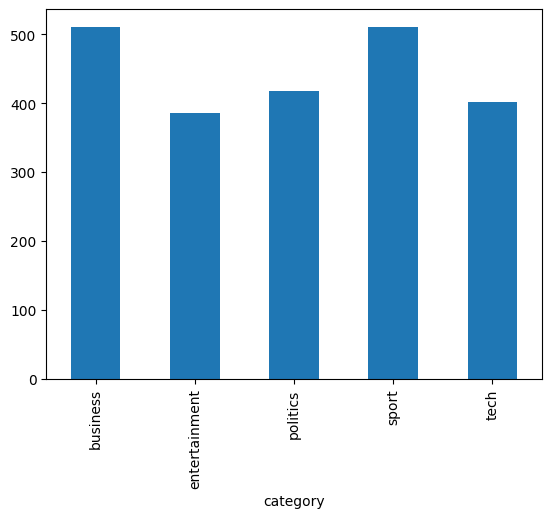

In [78]:
df.groupby(['category']).size().plot.bar()

As you can see, the dataframe only has two columns, which is category that will be our label, and text which will be our input data for BERT.

<div class="markdown-google-sans">

##### <strong>Preprocessing Data</strong>
</div>

As you might already know from the previous section, we need to transform our text into the format that BERT expects by adding [CLS] and [SEP] tokens. We can do this easily with BertTokenizer class from Hugging Face.

To make it easier for us to understand the output that we get from BertTokenizer, let’s use a short text as an example.

In [79]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

example_text = 'I will watch Memento tonight'
bert_input = tokenizer(example_text,padding='max_length', max_length = 10,
                       truncation=True, return_tensors="pt")

print(bert_input['input_ids'])
print(bert_input['token_type_ids'])
print(bert_input['attention_mask'])

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tensor([[  101,   146,  1209,  2824,  2508, 26173,  3568,   102,     0,     0]])
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0]])


Here is the explanation of BertTokenizer parameters above:

- padding : to pad each sequence to the maximum length that you specify.
- max_length : the maximum length of each sequence. In this example we use 10, but for our actual dataset we will use 512, which is the maximum length of a sequence allowed for BERT.
- truncation : if True, then the tokens in each sequence that exceed the maximum length will be truncated.
- return_tensors : the type of tensors that will be returned. Since we’re using Pytorch, then we use pt. If you use Tensorflow, then you need to use tf .

The outputs that you see from bert_input variable above are necessary for our BERT model later on. But what do those outputs mean?

1. The first row is input_ids , which is the id representation of each token. We can actually decode these input ids into the actual tokens as follows:

In [80]:
example_text = tokenizer.decode(bert_input.input_ids[0])
example_text

'[CLS] I will watch Memento tonight [SEP] [PAD] [PAD]'

As you can see, the BertTokenizer takes care of all of the necessary transformations of the input text such that it’s ready to be used as an input for our BERT model. It adds [CLS], [SEP], and [PAD] tokens automatically. Since we specified the maximum length to be 10, then there are only two [PAD] tokens at the end.

2. The second row is token_type_ids , which is a binary mask that identifies in which sequence a token belongs. If we only have a single sequence, then all of the token type ids will be 0. For a text classification task, token_type_ids is an optional input for our BERT model.

3. The third row is attention_mask , which is a binary mask that identifies whether a token is a real word or just padding. If the token contains [CLS], [SEP], or any real word, then the mask would be 1. Meanwhile, if the token is just padding or [PAD], then the mask would be 0.

As you might notice, we use a pre-trained BertTokenizer from bert-base-cased model. This pre-trained tokenizer works well if the text in your dataset is in English.

If you have datasets from different languages, you might want to use bert-base-multilingual-cased. Specifically, if your dataset is in German, Dutch, Chinese, Japanese, or Finnish, you might want to use a tokenizer pre-trained specifically in these languages.

To sum up, below is the illustration of what BertTokenizer does to our input sentence.


![picture](https://drive.google.com/uc?export=view&id=1o1p9z9D8w4QM7PDG1lvQ1NKVgqMNbJ76)



<div class="markdown-google-sans">

##### <strong>Dataset Class</strong>
</div>

Now that we know what kind of output that we will get from BertTokenizer , let’s build a Dataset class for our news dataset that will serve as a class to generate our news data.

In [81]:
import torch
import numpy as np
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
labels = {'business':0,
          'entertainment':1,
          'sport':2,
          'tech':3,
          'politics':4
          }

class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):

        self.labels = [labels[label] for label in df['category']]
        self.texts = [tokenizer(text,
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df['text']]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

In the above implementation, we define a variable called labels , which is a dictionary that maps the category in the dataframe into the id representation of our label. Notice that we also call BertTokenizer in the __init__ function above to transform our input texts into the format that BERT expects.

After defining dataset class, let’s split our dataframe into training, validation, and test set with the proportion of 80:10:10.

In [82]:
np.random.seed(112)
df_train, df_val, df_test = np.split(df.sample(frac=1, random_state=42), [int(.8*len(df)), int(.9*len(df))])

len(df_train),len(df_val), len(df_test)

(1780, 222, 223)

<div class="markdown-google-sans">

##### <strong>Model Building</strong>
</div>

So far, we have built a dataset class to generate our data. Now let’s build the actual model using a pre-trained BERT base model which has 12 layers of Transformer encoder.

If your dataset is not in English, it would be best if you use bert-base-multilingual-cased model. If your data is in German, Dutch, Chinese, Japanese, or Finnish, you can use the model pre-trained specifically in these languages.

In [83]:
from torch import nn
from transformers import BertModel

class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 5)
        self.relu = nn.ReLU()

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        final_layer = self.relu(linear_output)

        return final_layer

As you can see from the code above, BERT model outputs two variables:

- The first variable, which we named _ in the code above, contains the embedding vectors of all of the tokens in a sequence.
- The second variable, which we named pooled_output, contains the embedding vector of [CLS] token. For a text classification task, it is enough to use this embedding as an input for our classifier.

We then pass the pooled_output variable into a linear layer with ReLU activation function. At the end of the linear layer, we have a vector of size 5, each corresponds to a category of our labels (sport, business, politics, entertainment, and tech).

<div class="markdown-google-sans">

##### <strong>Training loop</strong>
</div>

Now it’s time for us to train the model. The training loop will be a standard PyTorch training loop.

We train the model for 5 epochs and we use Adam as the optimizer, while the learning rate is set to 1e-6. We also need to use categorical cross entropy as our loss function since we’re dealing with multi-class classification.

It is recommended that you use GPU to train the model since BERT base model contains 110 million parameters.

Obviously you might not get similar loss and accuracy values as the screenshot above due to the randomness of training process. If you haven’t got a good result after 5 epochs, try to increase the epochs to, let’s say, 10 or adjust the learning rate.



In [ ]:
from torch.optim import Adam
from tqdm import tqdm

def train(model, train_data, val_data, learning_rate, epochs):

    train, val = Dataset(train_data), Dataset(val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=2, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr= learning_rate)

    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in tqdm(train_dataloader):

                train_label = train_label.to(device)
                mask = train_input['attention_mask'].squeeze(1).to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)

                batch_loss = criterion(output, train_label.long())
                total_loss_train += batch_loss.item()

                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()

            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].squeeze(1).to(device) # A squeeze was missing
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask)

                    batch_loss = criterion(output, val_label.long())
                    total_loss_val += batch_loss.item()

                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc

            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} \
                | Train Accuracy: {total_acc_train / len(train_data): .3f} \
                | Val Loss: {total_loss_val / len(val_data): .3f} \
                | Val Accuracy: {total_acc_val / len(val_data): .3f}')

EPOCHS = 5
model = BertClassifier()
LR = 1e-6

train(model, df_train, df_val, LR, EPOCHS)

 25%|██▌       | 226/890 [1:02:24<3:18:24, 17.93s/it]

<div class="markdown-google-sans">

##### <strong>Evaluate Model on Test Data</strong>
</div>

Now that we have trained the model, we can use the test data to evaluate the model’s performance on unseen data. Below is the function to evaluate the performance of the model on the test set.

In [ ]:
def evaluate(model, test_data):

    test = Dataset(test_data)

    test_dataloader = torch.utils.data.DataLoader(test, batch_size=8)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    with torch.no_grad():

        for test_input, test_label in test_dataloader:

              test_label = test_label.to(device)
              mask = test_input['attention_mask'].to(device)
              input_id = test_input['input_ids'].squeeze(1).to(device)

              output = model(input_id, mask)

              acc = (output.argmax(dim=1) == test_label).sum().item()
              total_acc_test += acc

    print(f'Test Accuracy: {total_acc_test / len(test_data): .3f}')

evaluate(model, df_test)


Now you know the step on how we can leverage a pre-trained BERT model from Hugging Face for a text classification task.

One thing to remember is that we can use the embedding vectors from BERT to do not only a sentence or text classification task, but also the more advanced NLP applications such as question answering, next sentence prediction, or Named-Entity-Recognition (NER) tasks.


Comment on the results.

<font color='blue'>Answer:</font>

I wasn't able to finish this section because I ran out of GPU resources on Google Colab. Nevertheless, we should achieve high accuracy for both testing and training.

<div class="markdown-google-sans">

  ## <strong>5. Wrap up questions</strong>
</div>



1 - Imagine that you have these two sentences:

This is my dog

This is my cat

What would the BoW algorithm return, assuming that no text cleaning has been applied and that each word has been separated into a list?





<font color='blue'>Answer:</font>


1.   We create the vocabulary: *\['This', 'is', 'my', 'dog', 'cat']*
2.   Then we represent each sentence as a vector, where each element is going to correspond to the count of the respective words in the vocabulary.

  For the first sentence: *This*(1), *is*(1), *my*(1), *dog*(1), *cat*(0)
  
  For the second sentence: *This*(1), *is*(1), *my*(1), *dog*(0), *cat*(1)

3.   So the Bow algorithm will return the following vectors:

  - [1, 1, 1, 1, 0]
  - [1, 1, 1, 0, 1]





2 - Name the advantages and disadvantages of using BoW and TF-IDF.
when dealing with a very large set of words.



<font color='blue'>Answer:</font>

**Bag of Words**

- Advantages:
  - It is simple, easy to understand and implement as it does not require complex calculations.
  - For smaller dataset is efficient.
  - The resulting vectors are sparse, which can be beneficial for some machine learning algorithms.
- Disadvantages:
  - It does not capture context, as it treats the words independently, ignoring the order and the semantic relationship.
  - If we are dealing with a large dataset or vocabulary we are going to have high-dimensional vectors and this method is no longer going to be computationally eficient.
  - It also ignores the significance of word frequency.

**TF-IDF**

- Advantages:
  - It assings weights to the words based on their frequency.
  - It is very useful for document similarity or information retrieval.
- Disadvantages:
  - It is more complex than BoW because it requires calculation of term frequency and inverse document frequency for each word.
  - Similar to Bow, it ignores the context.
  - This method can also lead to high dimensional vectors

3 - Name and describe briefly 4 text cleaning techniques.




<font color='blue'>Answer:</font>

- **Lowercasing:** Converting all characters in the text to lowercase.
- **Removing White Spaces:** Stripping white spaces from the text to make sure it is consistently formatted.
- **Removing Stop Words:** Removing Common words that do not carry significant meaning, For example: *is*, *and*, etc.
- **Tokenization:** Along this practice we have seen tokenization at word, sentence and also character level. It breaks down the text into maneageable pieces for further processing.


4 - Why or when should you use clustering when dealing with text analysis?





<font color='blue'>Answer:</font>

- For **exploratory analysis**, it can help to explore the underlying structure within a text.
- For **topic modeling**, by clustering the documents we can identify clusters representing different topics or themes, like for the films in this practice.
- For a **recomendation system**, it can be used to recommend similar films, for example, to userts based on the clusters to which the films they have liked belong.


5 - How does hierarchical clustering work?



<font color='blue'>Answer:</font>

 It is a clustering algorithm that builds a hierarchy of clusters. It does this by iteratively merging or splitting clusters based on their similarity until all data points belong to a single cluster. In this practice we have applied a **Aglomerative Hierarchical Clustering**, where each data point starts as its own cluster, and at each iteration, the algorithm merges the two closest clusters based on a chosen distance metric. This process continues until all data points are in a single cluster o until a stopping criterion is met.

6 - What is the idea behind Word Embeddings?



<font color='blue'>Answer:</font>

Word Embeddings are vector representations of words in a continuous vector space, where each word is mapped to a high-dimensional vector. The idea behind word embeddings is to capture semantic and syntactic similarities between words by representing them as vectors in a way that words with similar meanings or contexts are closer together in the embedding space.

7 - What is the difference between Continuous Skip-Gram and continuous Bag-Of-Words?



<font color='blue'>Answer:</font>

The main difference between CBOW and Skip-Gram lies in their main task. While CBOW focuses on predicting the target word within a sentence, Skip-Gram focuses on forecasting the context words surrounding a given target word.

In CBOW the nerual network learns by averaging the embeddings of context words to predict the the target word. Skip-Gram uses the target word's embedding to predict the embeddings of context words, making it more adept at capturing syntactic relationships.

8 - Why is it more complex to train Continuous Skip-Gram than to train Continuous Bag-Of-Words?


<font color='blue'>Answer:</font>

- Skip-Gram generates more training samples compared to CBOW. For each target word, it creates multiple training instances corresponding to its context words. This results in a larger number of training samples, leading to increased computational time.

- Skip-Gram requires learning the embeddings of both target words and context words separately, resulting in a more complex model architecture compared to CBOW.


9 - Describe the steps followed by a text search engine.

<font color='blue'>Answer:</font>



1.   **Feature Extraction:** Using TF-IDF or calculating the average we convert the input text into numerical feature representations.
2.   **Model Training:** Once the features are extracted from the input texts, a KNN (for example) is trained using this features.
3.   **Search Engine Operation:** To perform a search, the search engine is going to take the input text and convert it into numerical feature representation, then with the KNN trained model we are going to find the most similar texts to the input text. At last, the search engine is goign to return the nearest neighbor texts along with their cosine distances.

